# Подготовка данных

In [1]:
%matplotlib inline
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"InternationalBifurca_DATA_2023-10-30_0629.csv", sep=',')

In [3]:
df = df.dropna(subset=['sex'])
df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,major_required_trans_f5,tlr_f5,tvr_f5
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
anyInf = df[df == np.inf].sum()
anyInf[anyInf != 0]

stent_distal_vessel_size    inf
sb_stent_sb_diametr         inf
dtype: object

In [5]:
patient_info_cols = ['record_id', 'date', 'sex', 'age', 'adhoc_pci', 'weight', 'height', 
                     'race', 'clinical_presentation', 'time_from_mi_symptoms_onse', 
                     'ccs_class', 'diabet', 'insulin_diabetes', 'hypertension', 'smoking', 
                     'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'valvular_disease', 
                     'valvular_disease_was_previ', 'if_yes_what_type___1', 'if_yes_what_type___2', 
                     'if_yes_what_type___3', 'if_yes_what_type___4', 'if_yes_what_type___5', 
                     'if_yes_what_type___6', 'if_yes_what_type___7', 'ef', 'creatinine', 'ckd', 
                     'mi_history', 'cerebrovascular_disease', 'previously_treated_cerebro', 'previous_stroke_tia', 
                     'peripheral_artery_disease', 'previously_treated_periphe', 'copd', 'history_of_cancer', 
                     'previous_pci', 'previous_cabg']

invention_cols = ['single_vessel', 'trifurcation', 'several_biffurcations', 'bifurcation_location', 
                  'lesion_ivolves', 'protected_left_main', 'angle', 'calcium', 'trombosis', 
                  'total_trobotic_occlusion', 'restenosis_reocclusion', 'overlap_sb', 'cto_bifurc', 
                  'syntax_score', 'medina_proximal', 'medina_distal', 'medina_side', 'mb_length_proximal', 
                  'sb_length', 'proximal_diametr', 'distal_diametr', 'side_diametr', 'stenosis_proximal', 
                  'stenosis_distal', 'timi_flow_main_branch', 'side_stenosis', 'timi_flow_side_branch', 
                  'major_lm', 'major_non_lm', 'minor_criteria', 'main_branch_rvd', 'def', 'def_2']

operation_cols = ['side_protection', 'main_predilatation', 'side_predilat', 'trombus_aspiration', 
                  'kissing_predilitation', 'stenting', 'drug_coated_balloon', 'balloon_angioplasty', 
                  'stent_was_implated_from_lm', 'stent_number', 'stent_number_bif', 'stent_technique', 
                  'first_stent_impanted', 'provisional_2_stent_techni', 'stent_direction', 'defered_stenting', 
                  'stent_diameter', 'stent_length', 'stent_type___1', 'stent_type___2', 'stent_type___3', 
                  'stent_type___4', 'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 
                  'stent_type___8', 'dstent2', 'stent_length2', 'stent_distal_vessel_size', 
                  'sb_stent_side_branch_diametr', 'sb_stent_sb_diametr', 'twostent_technique', 
                  'sb_dilatation', 'stent_postdilatation', 'proximal_optimization', 'pot', 
                  'pot_balloon_diametr', 'kissing_post', 'modified_kis', 'several_kissing']

In [6]:
non_vascular_deaths = ['MNRI1054', 'MNRI1191', 'MNRI1351', 'MNRI1352', 'MNRI1473', 'MNRI1670', 'MNRI0637', 'MNRI0656', 'MNRI0751', 'MNRI0758',
                      'MNRI0805', 'MNRI0818', 'MNRI1054', 'MNRI0087', 'MNRI1191', 'MNRI0108', 'MNRI0307', 'MNRI0215', 'MNRI0322', 'MNRI0293',
                      'MNRI0156', 'MNRI0215', 'MNRI0488', 'MNRI0612', 'MNRI0708', 'MNRI0767', 'MNRI0772', 'MNRI0786', 'MNRI1105', 'MNRI1186',
                      'MNRI1462', 'MNRI1633']

In [7]:
df = df[~df['record_id'].isin(non_vascular_deaths)]

In [8]:
df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,time_to_death_f5,time_to_acs_f5,time_to_stroke_f5,time_to_pci_f5,time_to_cabg_f5,hospitalization_f5,bleeding_f5,major_required_trans_f5,tlr_f5,tvr_f5
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
patient_present_cols = patient_info_cols + invention_cols + operation_cols
patient_present_df = pd.DataFrame({col_name: df[col_name] for col_name in patient_present_cols})

In [10]:
patient_present_df

,record_id,date,sex,age,adhoc_pci,weight,height,race,clinical_presentation,time_from_mi_symptoms_onse,...,sb_stent_sb_diametr,twostent_technique,sb_dilatation,stent_postdilatation,proximal_optimization,pot,pot_balloon_diametr,kissing_post,modified_kis,several_kissing
0,MNRI0001,2018-02-01,2.0,77.0,1.0,84.0,165.0,1.0,5.0,4.0,...,0.952381,7.0,0.0,1.0,0.0,NaN,NaN,1.0,0.0,0.0
1,MNRI0002,2018-01-24,1.0,68.0,0.0,81.0,171.0,1.0,1.0,NaN,...,1.333333,NaN,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0
2,MNRI0003,2018-01-24,1.0,62.0,0.0,74.0,180.0,1.0,4.0,NaN,...,1.153846,NaN,0.0,1.0,0.0,NaN,NaN,0.0,0.0,NaN
3,MNRI0004,2018-01-30,1.0,67.0,1.0,84.0,167.0,1.0,2.0,NaN,...,1.285714,NaN,0.0,0.0,1.0,1.0,5.0,0.0,0.0,NaN
4,MNRI0005,2018-01-30,1.0,57.0,0.0,103.0,174.0,1.0,1.0,NaN,...,1.590909,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,TRCH0026,2019-03-11,1.0,67.0,1.0,90.0,174.0,1.0,2.0,NaN,...,1.500000,NaN,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0
2054,TRCH0027,2019-03-18,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,...,1.100000,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN
2055,TRCH0028,2019-03-19,2.0,81.0,0.0,50.0,160.0,1.0,2.0,NaN,...,1.000000,7.0,1.0,1.0,1.0,0.0,NaN,1.0,1.0,0.0
2056,TRCH0029,2019-03-28,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,...,0.750000,NaN,0.0,0.0,1.0,1.0,4.0,0.0,0.0,NaN


In [11]:
def remove_columns_with_nan_threshold(df, threshold=250):
    """
    Удаление колонок из DataFrame с количеством NaN больше заданного порога.

    Параметры:
    df : pandas.DataFrame
        Исходный DataFrame, из которого будут удалены колонки.
    threshold : int
        Пороговое значение количества NaN для удаления колонки.

    Возвращает:
    pandas.DataFrame
        DataFrame после удаления колонок.
    """
    # Считаем количество NaN в каждой колонке
    nan_counts = df.isnull().sum()

    # Получаем список колонок, которые нужно удалить
    columns_to_drop = nan_counts[nan_counts > threshold].index

    # Удаляем колонки
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

In [12]:
patient_present_df = remove_columns_with_nan_threshold(patient_present_df, 500)

In [13]:
patient_present_df = patient_present_df.drop(['record_id', 'date'], axis = 1)
patient_present_df

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,77.0,1.0,84.0,165.0,1.0,5.0,0.0,1.0,0.0,...,0,0,0,0,1.111111,0.952381,0.0,1.0,1.0,0.0
1,1.0,68.0,0.0,81.0,171.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.290323,1.333333,0.0,0.0,1.0,0.0
2,1.0,62.0,0.0,74.0,180.0,1.0,4.0,0.0,1.0,1.0,...,0,0,0,0,1.000000,1.153846,0.0,1.0,0.0,0.0
3,1.0,67.0,1.0,84.0,167.0,1.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0.957447,1.285714,0.0,0.0,0.0,0.0
4,1.0,57.0,0.0,103.0,174.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.250000,1.590909,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1.0,67.0,1.0,90.0,174.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.200000,1.500000,1.0,1.0,1.0,1.0
2054,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,1.0,0.0,...,0,0,1,0,1.100000,1.100000,0.0,0.0,0.0,0.0
2055,2.0,81.0,0.0,50.0,160.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.000000,1.000000,1.0,1.0,1.0,1.0
2056,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,1.0,0.0,...,0,0,0,0,1.090909,0.750000,0.0,0.0,0.0,0.0


In [14]:
patient_present_df.replace(to_replace = [np.inf, -np.inf], value= None, inplace=True)

In [15]:
cols_to_drop = patient_present_df.columns[patient_present_df.nunique() <= 1]
patient_present_df = patient_present_df.drop(cols_to_drop, axis=1)
patient_present_df

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,77.0,1.0,84.0,165.0,1.0,5.0,0.0,1.0,0.0,...,0,0,0,0,1.111111,0.952381,0.0,1.0,1.0,0.0
1,1.0,68.0,0.0,81.0,171.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.290323,1.333333,0.0,0.0,1.0,0.0
2,1.0,62.0,0.0,74.0,180.0,1.0,4.0,0.0,1.0,1.0,...,0,0,0,0,1.0,1.153846,0.0,1.0,0.0,0.0
3,1.0,67.0,1.0,84.0,167.0,1.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0.957447,1.285714,0.0,0.0,0.0,0.0
4,1.0,57.0,0.0,103.0,174.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1.25,1.590909,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1.0,67.0,1.0,90.0,174.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.2,1.5,1.0,1.0,1.0,1.0
2054,1.0,69.0,1.0,60.0,174.0,1.0,3.0,1.0,1.0,0.0,...,0,0,1,0,1.1,1.1,0.0,0.0,0.0,0.0
2055,2.0,81.0,0.0,50.0,160.0,1.0,2.0,2.0,1.0,0.0,...,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0
2056,1.0,86.0,1.0,74.0,170.0,1.0,3.0,1.0,1.0,0.0,...,0,0,0,0,1.090909,0.75,0.0,0.0,0.0,0.0


In [16]:
numerical = ['age', 'weight', 'height', 'ef', 'creatinine', 'ckd', 'angle', 'mb_length_proximal', 'proximal_diametr', 'distal_diametr', 'side_diametr',
            'stenosis_proximal', 'stenosis_distal', 'side_stenosis', 'minor_criteria', 'main_branch_rvd', 'stent_diameter', 'stent_length',
            'stent_distal_vessel_size', 'sb_stent_sb_diametr']
cathegorical = ['sex', 'race', 'clinical_presentation', 'bifurcation_location', 'stent_number', 'stent_number_bif', 'stent_technique',
               'stent_direction', ]
binary = ['diabet', 'adhoc_pci', 'hypertension', 'smoking', 'dyslipidemia', 'anemia', 'atrial_fibrilation', 'oac_use', 'if_yes_what_type___1',
         'if_yes_what_type___2', 'if_yes_what_type___3', 'if_yes_what_type___4',  'if_yes_what_type___6', 
          'mi_history', 'cerebrovascular_disease', 'peripheral_artery_disease', 'copd', 'history_of_cancer',
         'previous_pci', 'previous_cabg', 'single_vessel', 'trifurcation', 'several_biffurcations', 'calcium', 'trombosis', 'restenosis_reocclusion',
         'cto_bifurc', 'medina_proximal', 'medina_distal', 'medina_side', 'major_lm', 'major_non_lm', 'def', 'def_2', 'side_protection', 'main_predilatation',
         'side_predilat', 'kissing_predilitation', 'stenting', 'defered_stenting', 'stent_type___1', 'stent_type___2', 'stent_type___3', 'stent_type___4',
         'stent_type___5', 'stent_type___6', 'stent_type___7', 'stent_type___9', 'stent_type___8', 'sb_dilatation', 'stent_postdilatation',
         'kissing_post', 'modified_kis']

In [17]:
without_second_bif = df
adverse_events = without_second_bif['event_type_followup_f2___1'] \
| without_second_bif['event_type_followup_f2___2'] \
| without_second_bif['event_type_followup_f2_v2___1'] \
| without_second_bif['event_type_followup_f2_v2___2']
print(sum(adverse_events))
print(len(adverse_events))

146
1961


In [18]:
combined = zip(without_second_bif['event_type_followup_f2___1'],  
               without_second_bif['event_type_followup_f2___2'] * 2,
               without_second_bif['event_type_followup_f2_v2___1'] * 3, 
               without_second_bif['event_type_followup_f2_v2___2'] * 4)

combined_adverse_events = np.array([max(t) for t in combined])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(patient_present_df, combined_adverse_events, test_size=0.4, stratify=combined_adverse_events, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=42)

In [20]:
y_train[y_train != 0] = 1
y_test[y_test != 0] = 1
y_val[y_val != 0] = 1

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[cathegorical + binary] = imputer_categorical.fit_transform(X_train[cathegorical + binary])
X_test[cathegorical + binary] = imputer_categorical.transform(X_test[cathegorical + binary])
X_val[cathegorical + binary] = imputer_categorical.transform(X_val[cathegorical + binary])

imputer = IterativeImputer(random_state=0)
columns = list(X_train.columns)
X_train = pd.DataFrame(data = imputer.fit_transform(X_train), columns = columns)
X_test = pd.DataFrame(data = imputer.transform(X_test), columns = columns)
X_val = pd.DataFrame(data = imputer.transform(X_val), columns = columns)

X_train

,sex,age,adhoc_pci,weight,height,race,clinical_presentation,diabet,hypertension,smoking,...,stent_type___6,stent_type___7,stent_type___9,stent_type___8,stent_distal_vessel_size,sb_stent_sb_diametr,sb_dilatation,stent_postdilatation,kissing_post,modified_kis
0,2.0,68.0,0.0,76.000000,154.000000,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.857143,1.034483,0.0,1.0,0.0,0.0
1,1.0,67.0,0.0,80.000000,167.000000,1.0,5.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,1.086957,0.0,0.0,0.0,0.0
2,1.0,52.0,1.0,100.000000,170.000000,1.0,3.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.937500,0.731707,0.0,0.0,0.0,0.0
3,1.0,75.0,0.0,87.000000,179.000000,1.0,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.071429,1.304348,0.0,1.0,0.0,0.0
4,2.0,65.0,1.0,86.614613,159.897683,1.0,3.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.757576,0.833333,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1.0,57.0,0.0,90.000000,167.000000,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.290323,1.142857,0.0,0.0,1.0,0.0
1172,1.0,59.0,1.0,75.000000,168.000000,1.0,3.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.206897,1.346154,0.0,0.0,0.0,0.0
1173,1.0,69.0,0.0,66.000000,170.000000,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.166667,1.206897,0.0,0.0,1.0,1.0
1174,1.0,57.0,0.0,93.000000,185.000000,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.290323,1.333333,0.0,0.0,1.0,0.0


/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


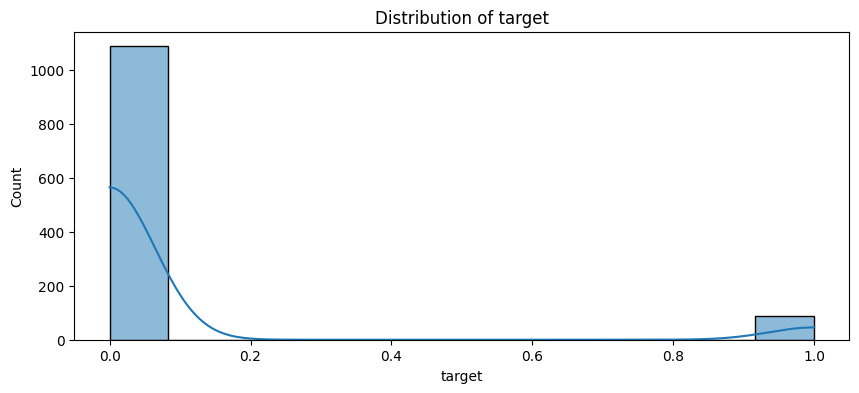

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(y_train, kde=True)
plt.title(f'Distribution of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


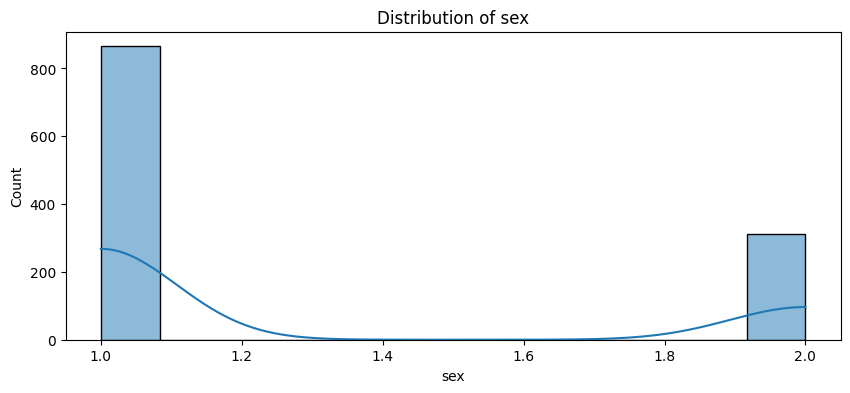

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


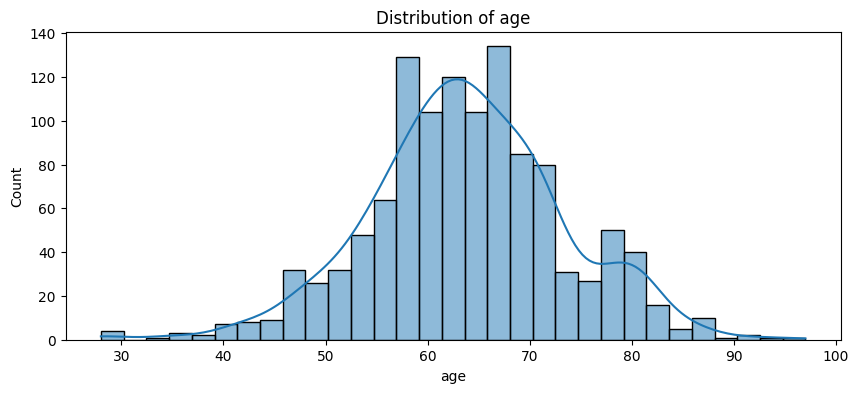

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


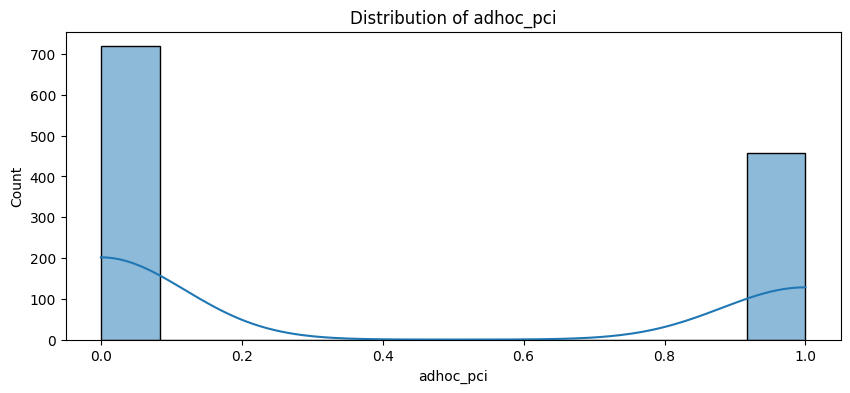

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


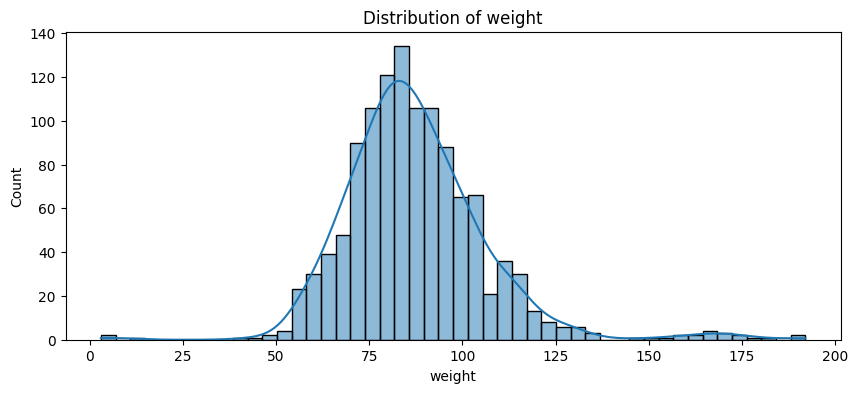

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


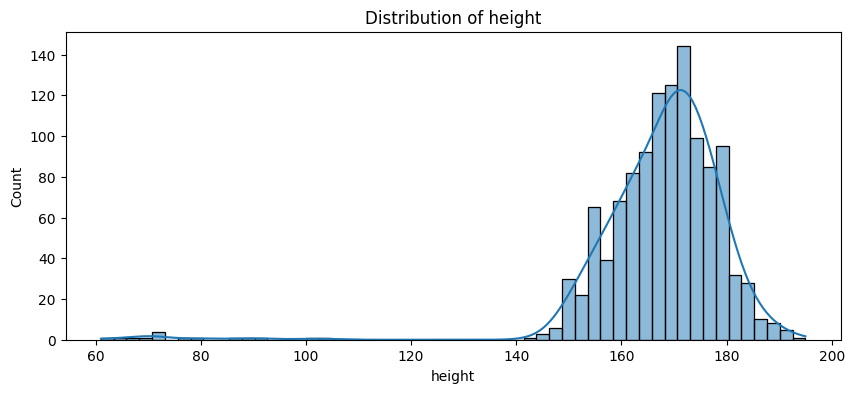

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


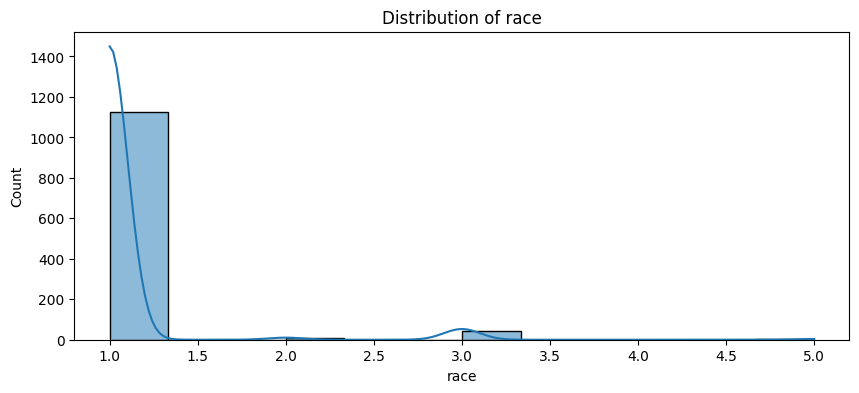

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


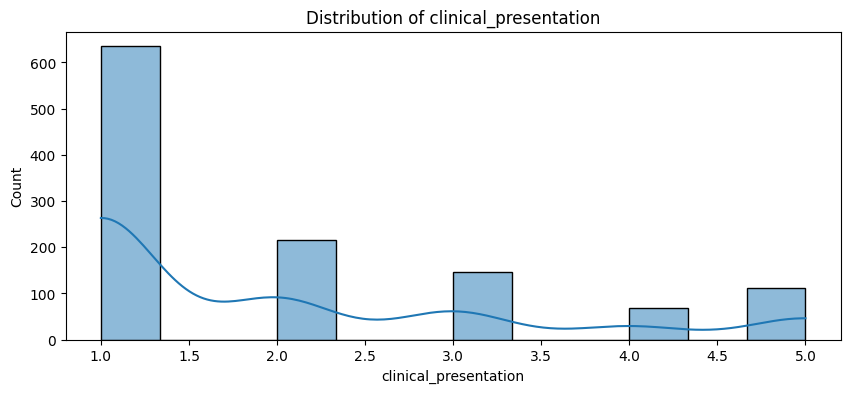

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


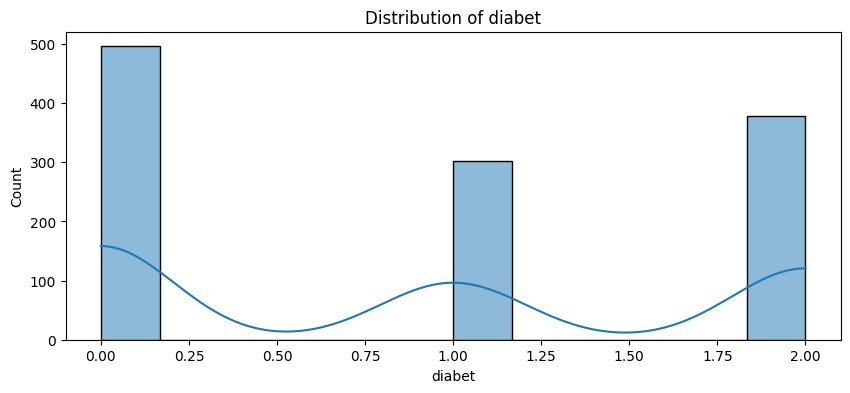

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


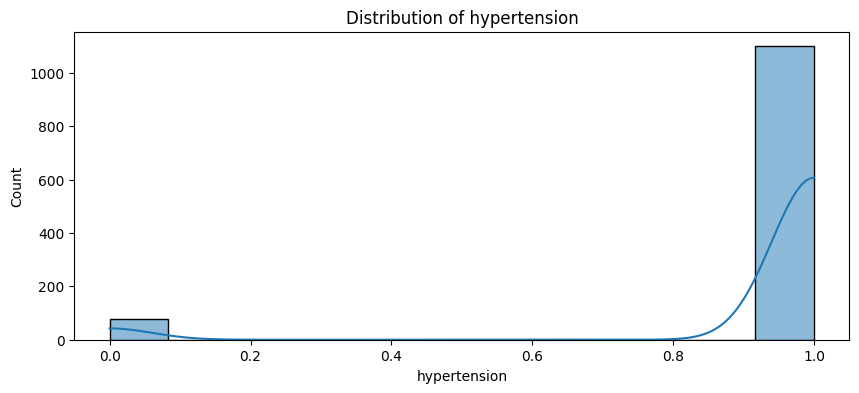

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


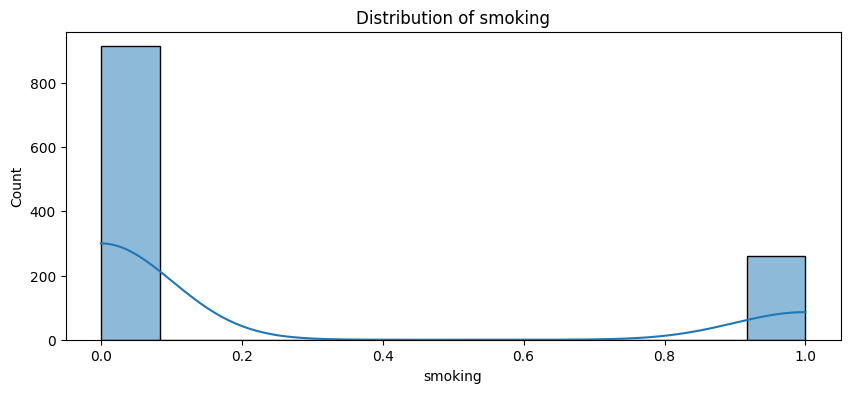

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


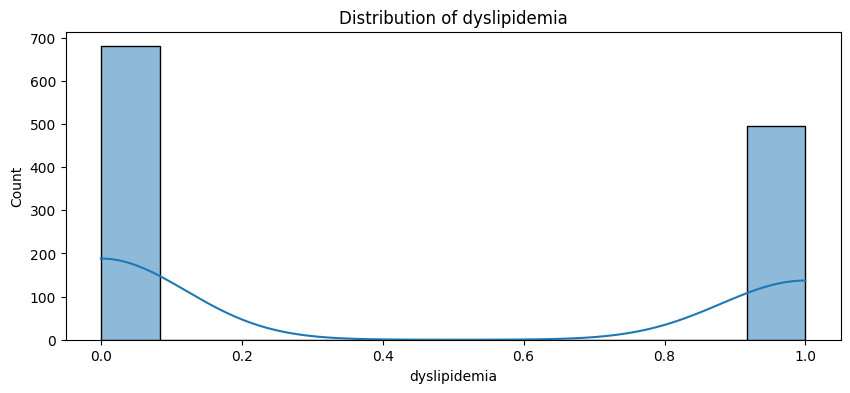

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


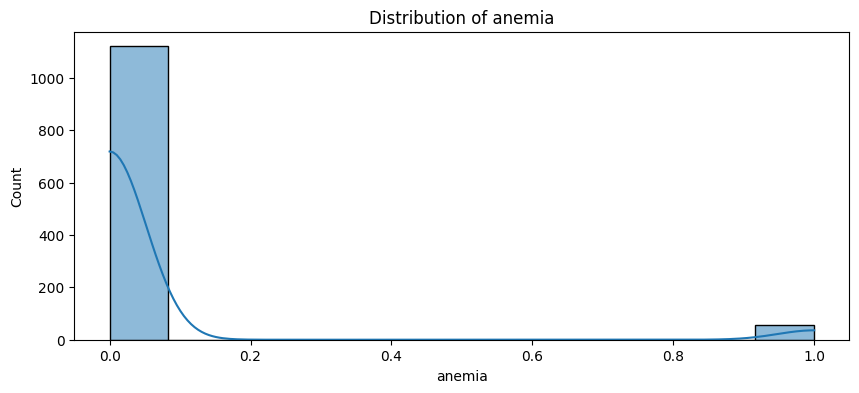

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


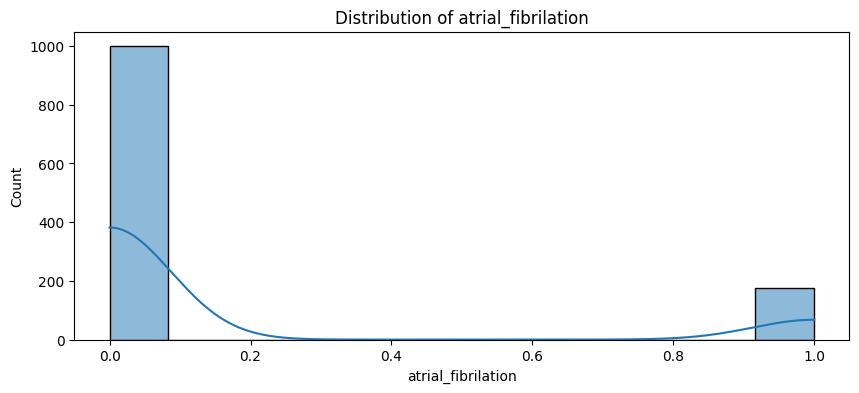

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


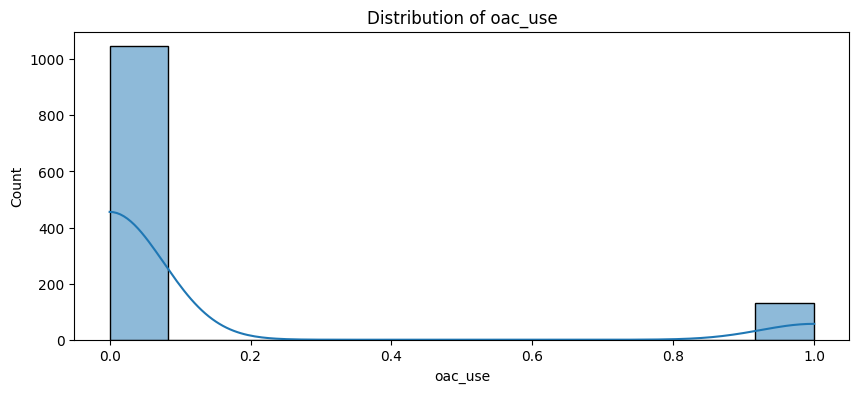

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


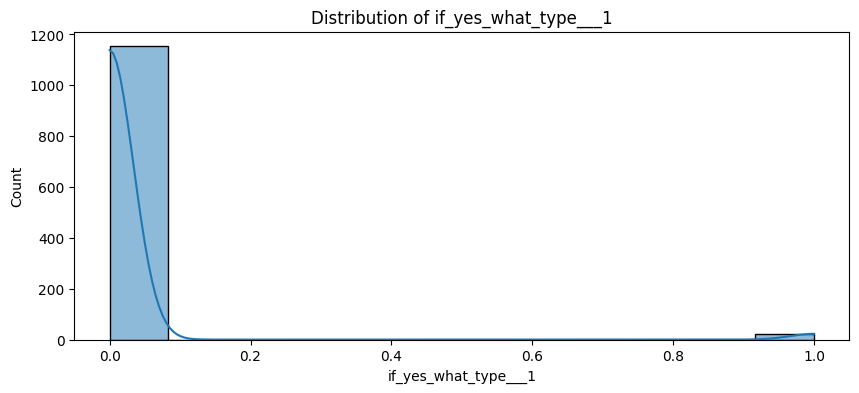

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


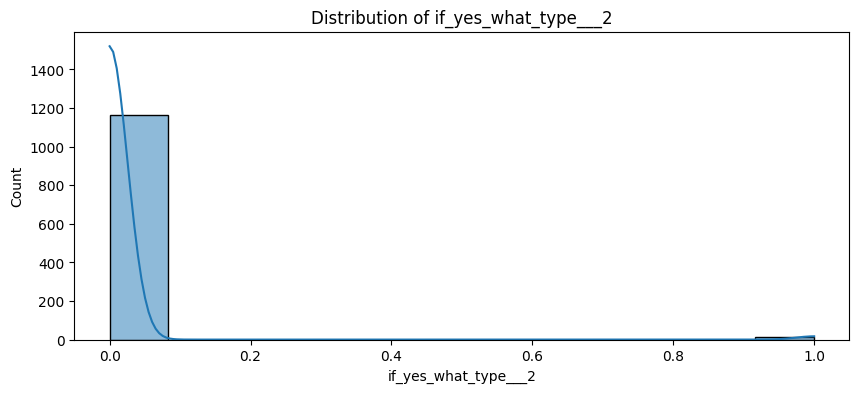

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


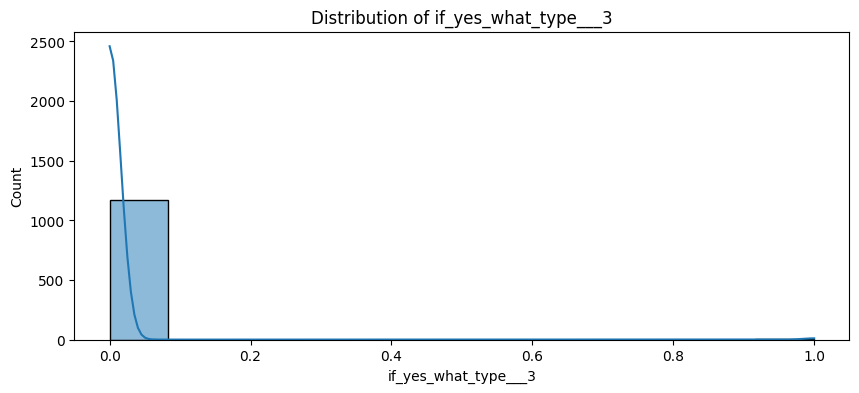

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


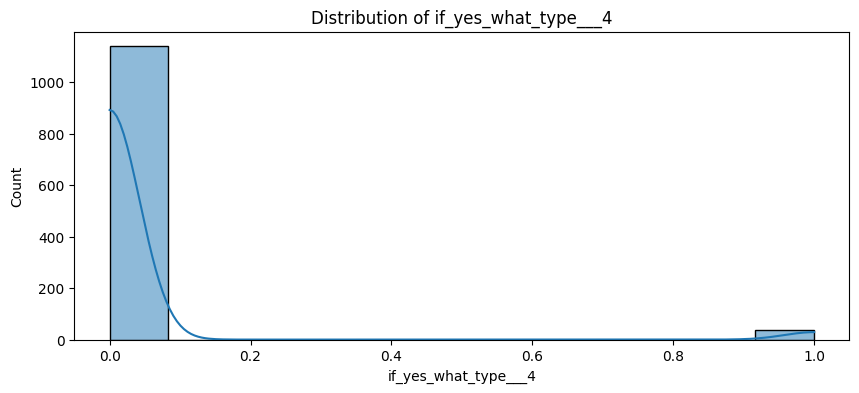

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


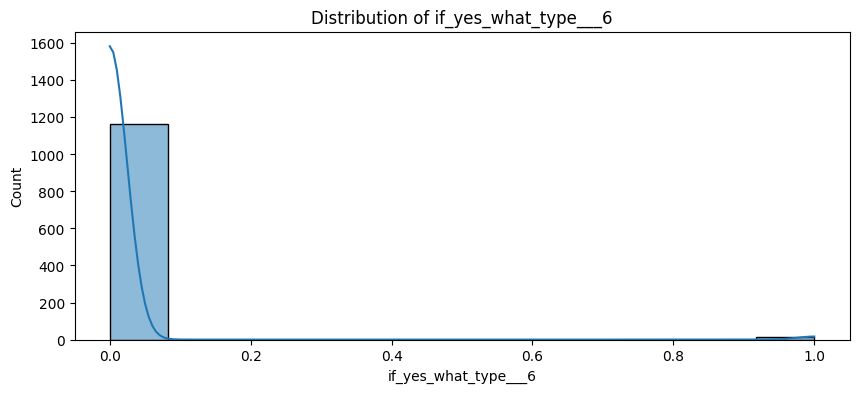

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


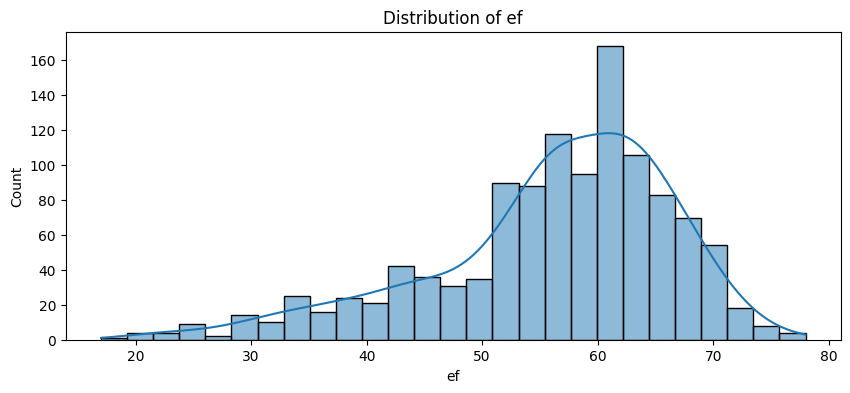

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


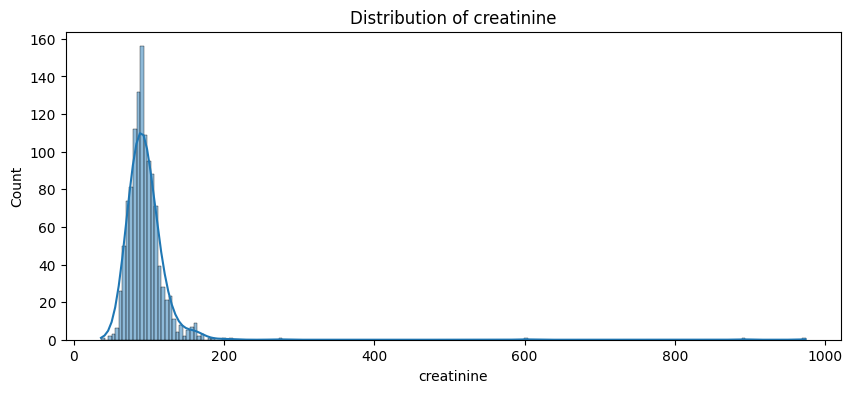

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


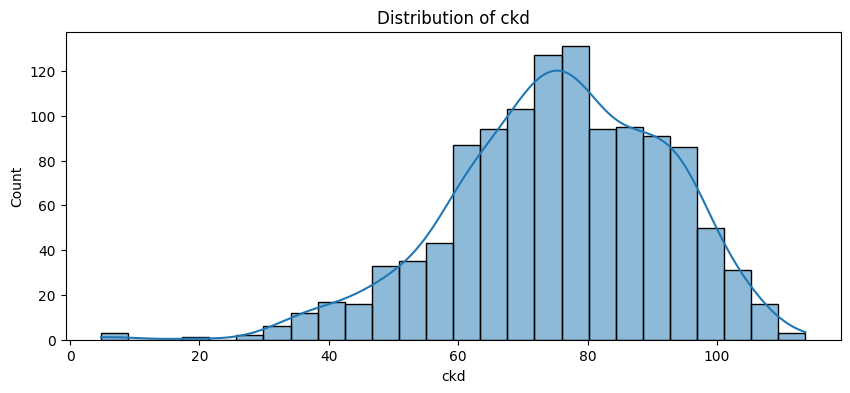

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


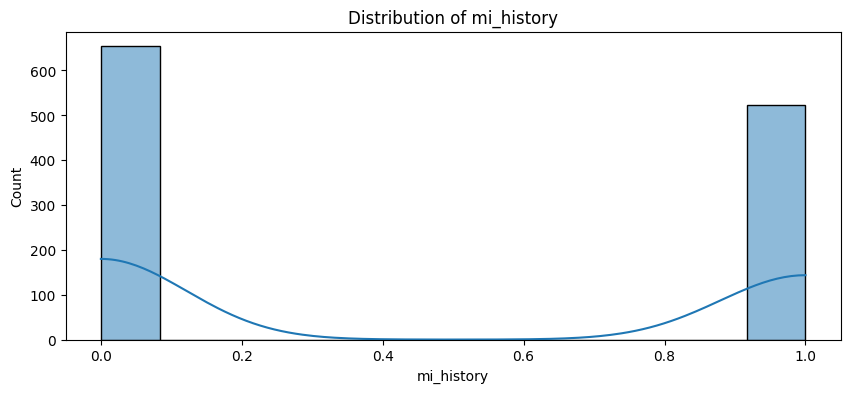

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


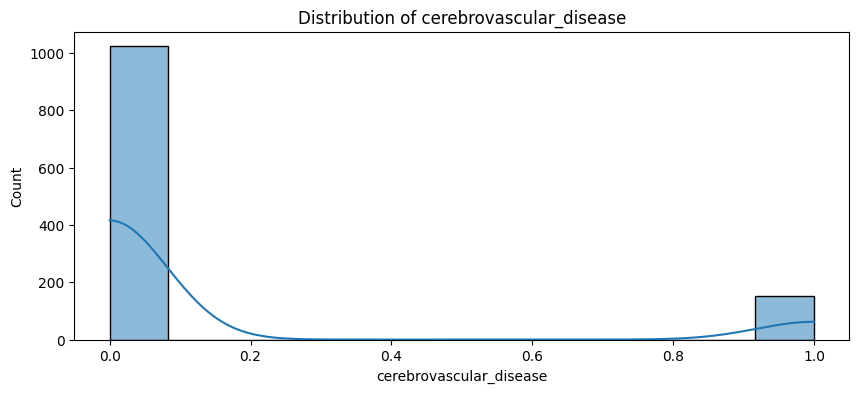

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


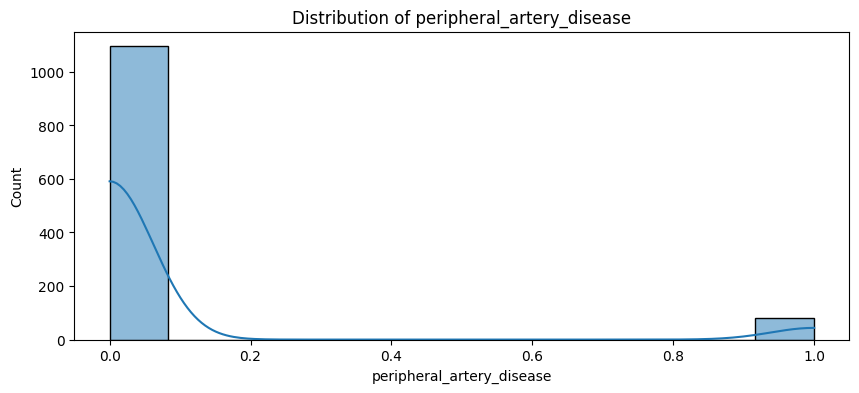

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


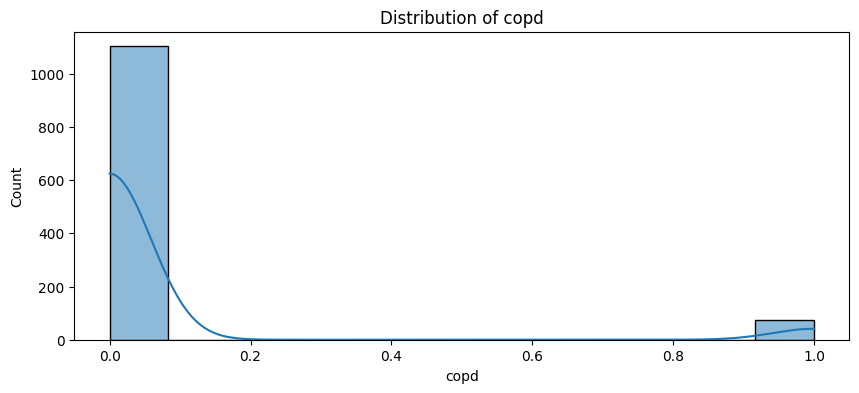

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


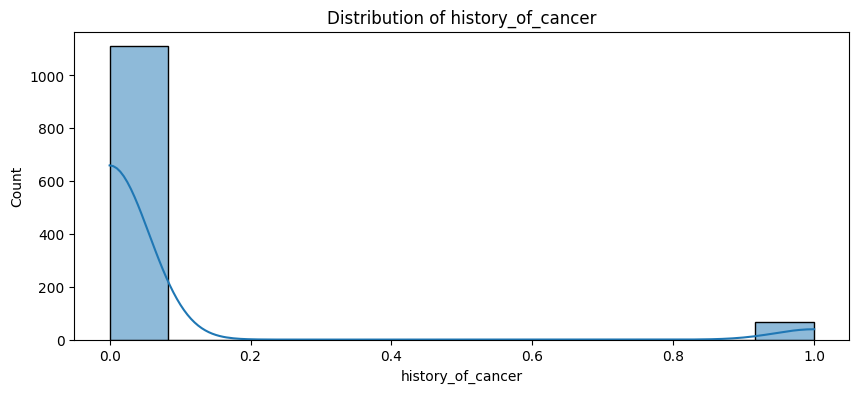

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


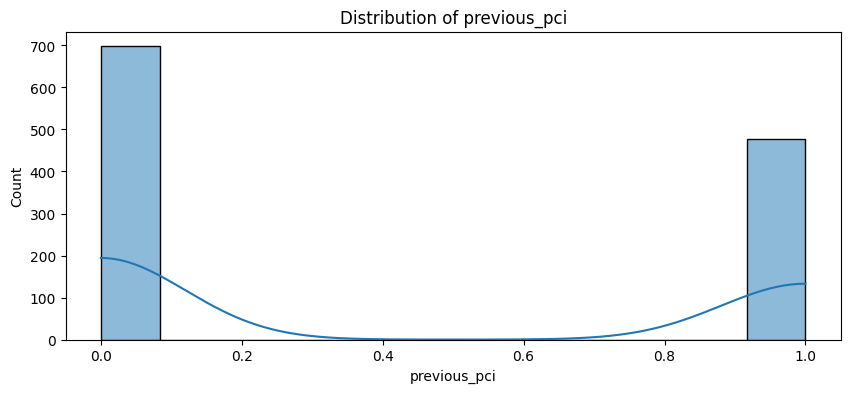

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


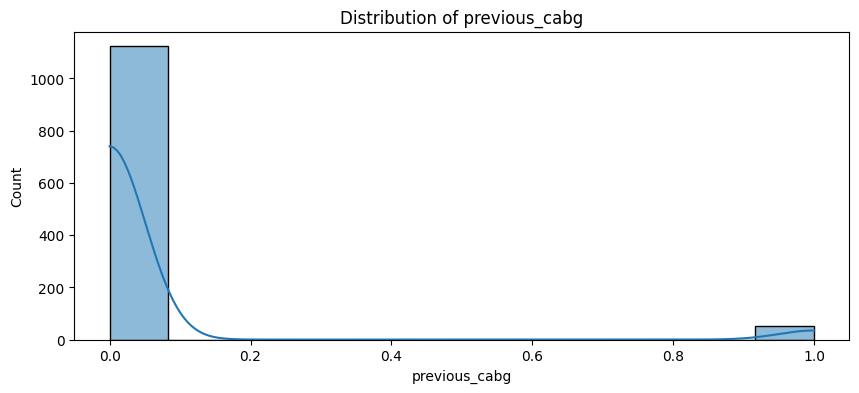

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


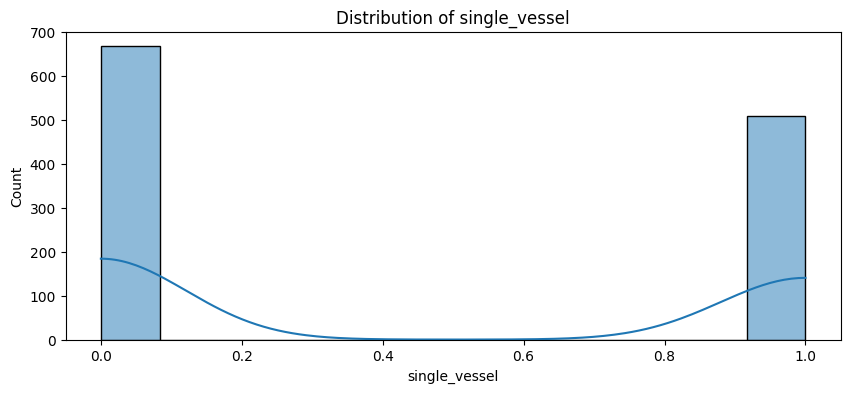

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


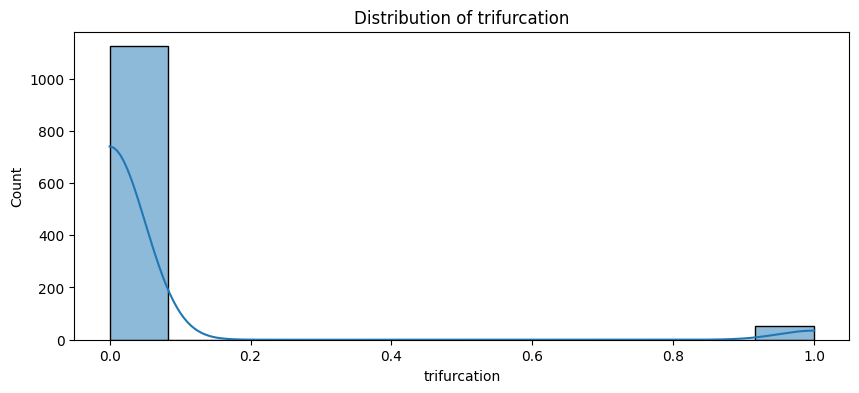

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


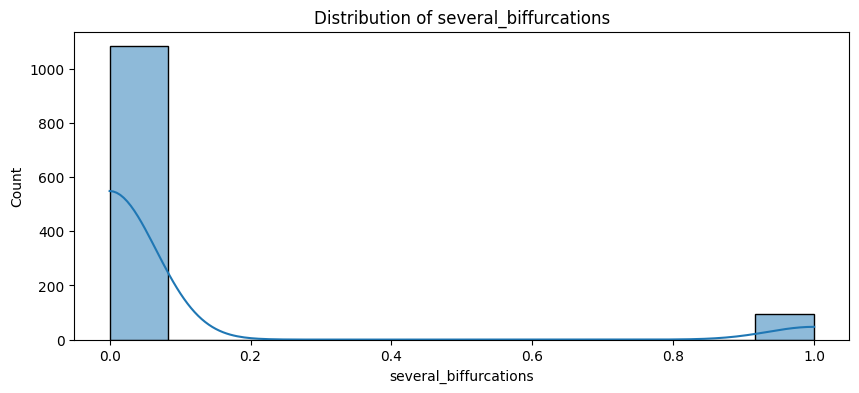

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


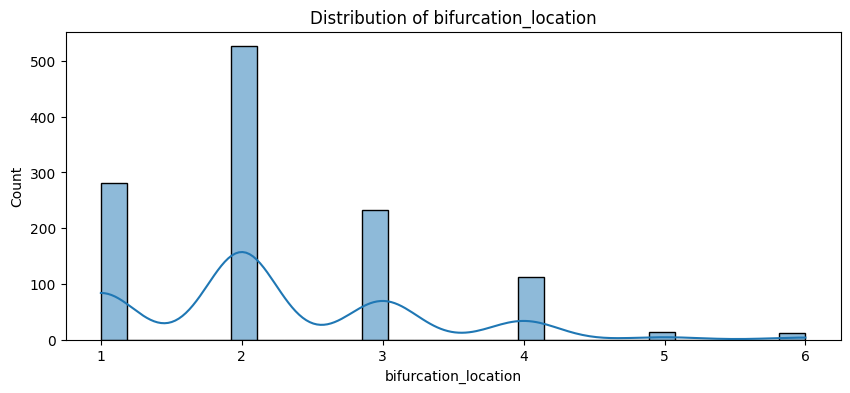

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


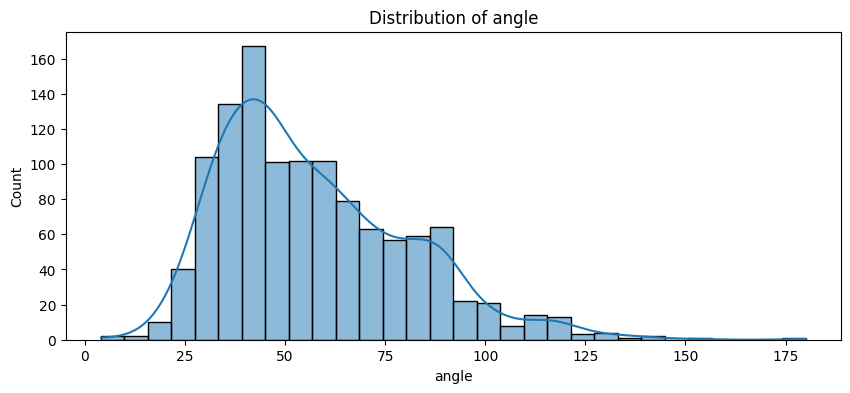

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


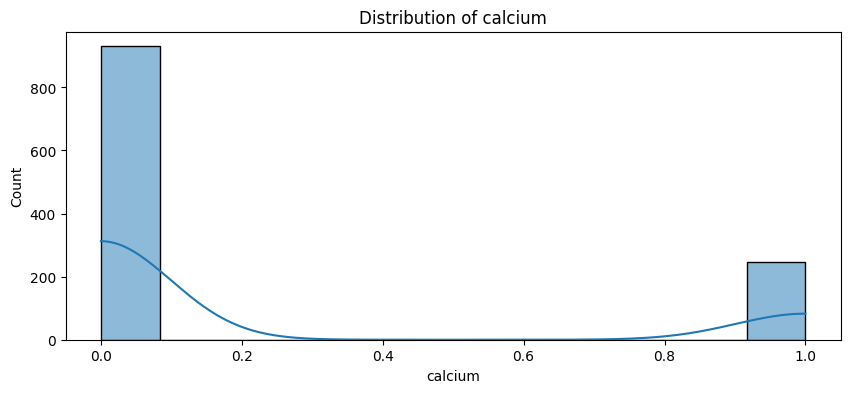

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


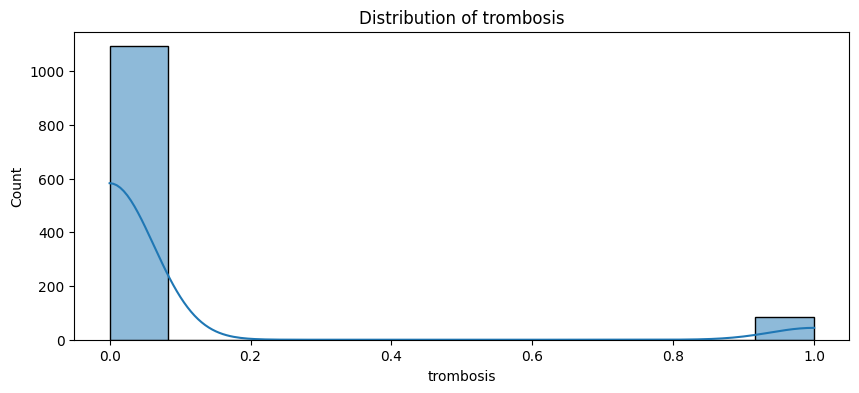

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


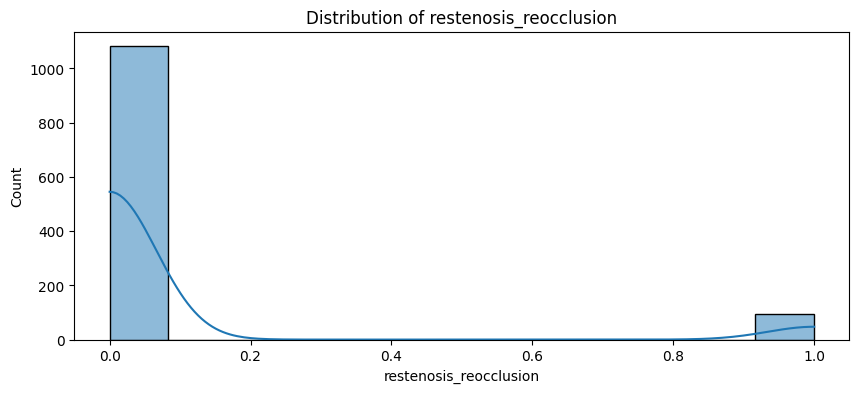

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


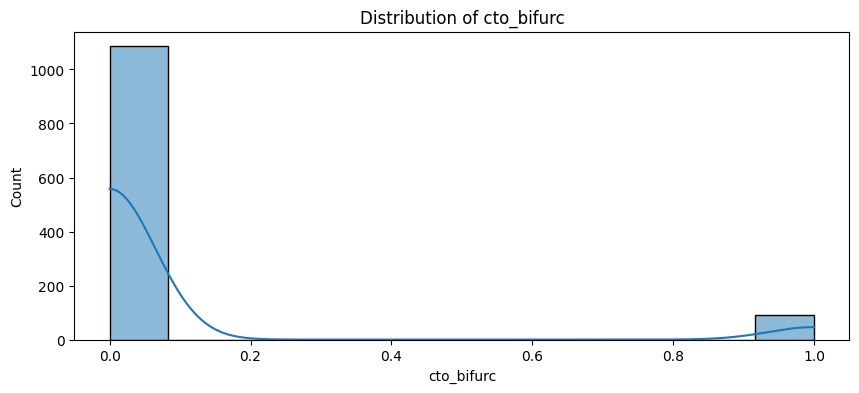

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


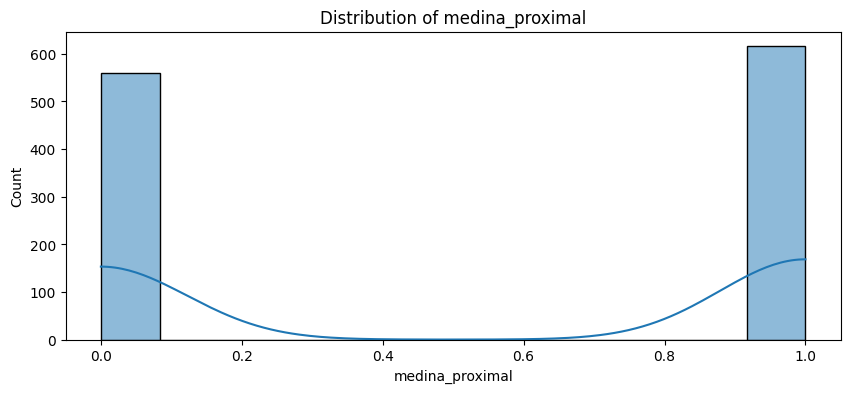

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


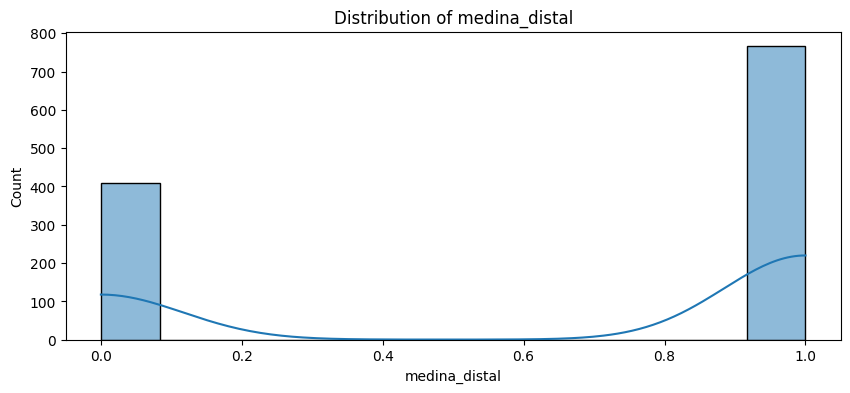

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


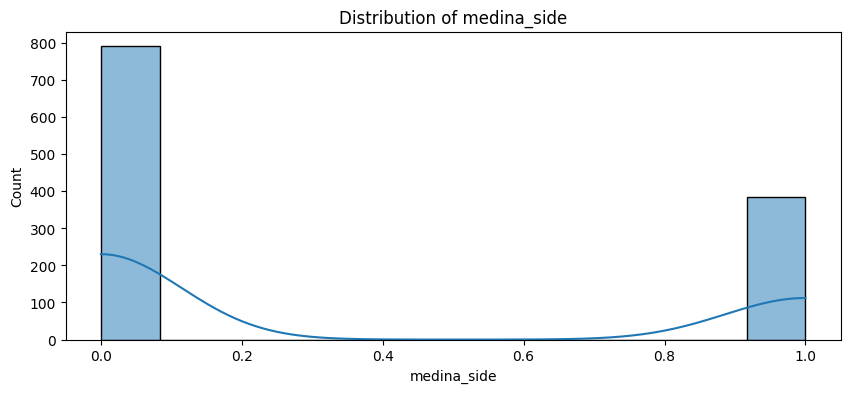

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


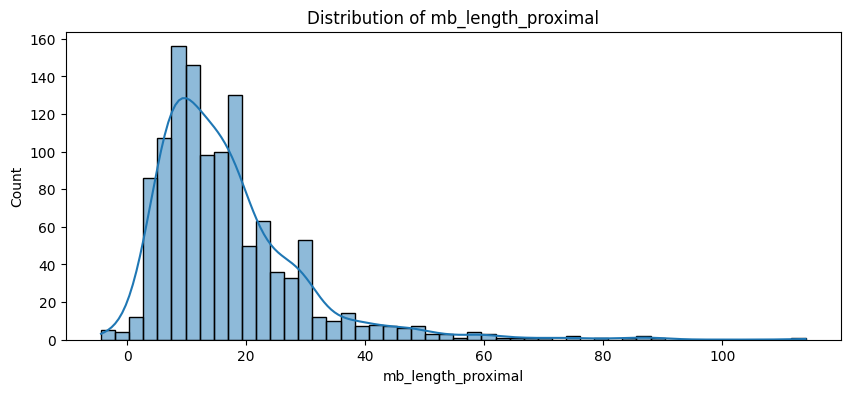

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


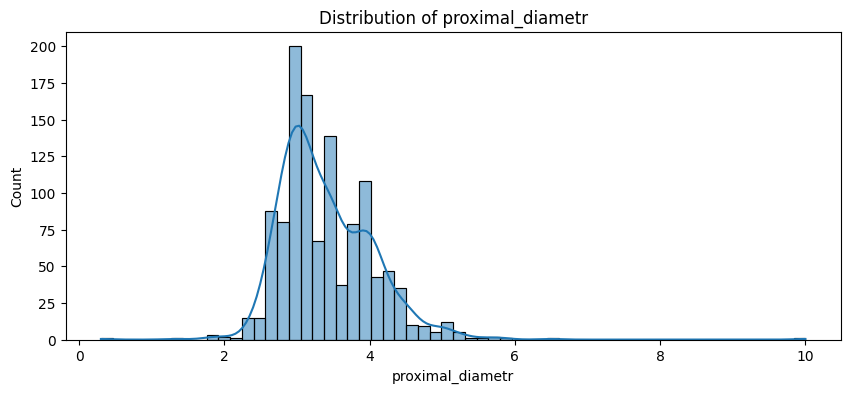

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


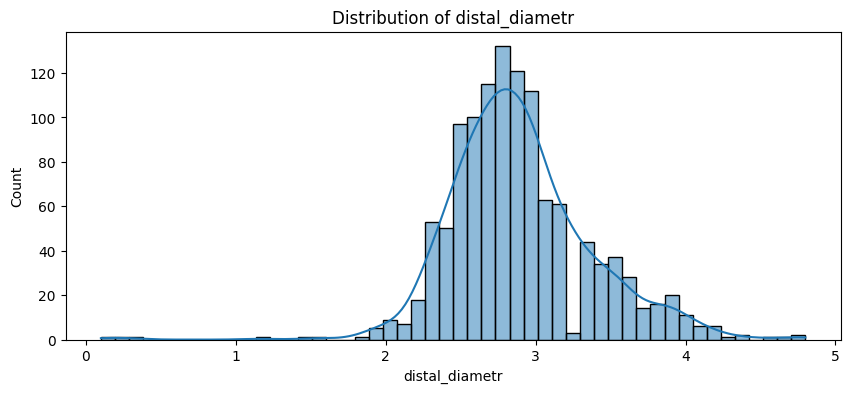

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


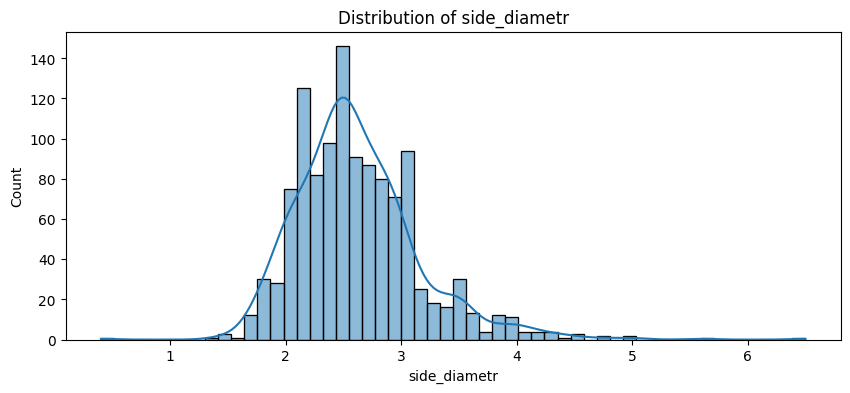

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


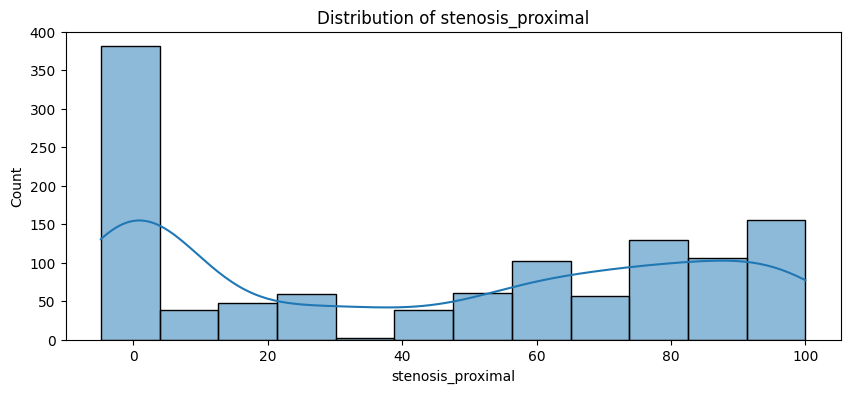

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


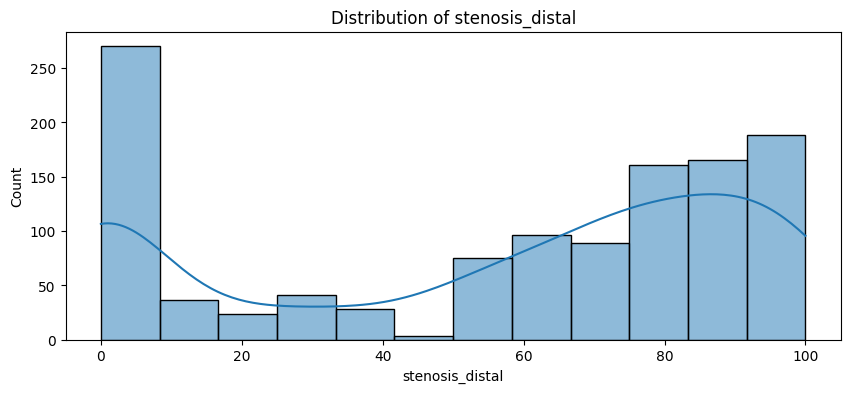

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


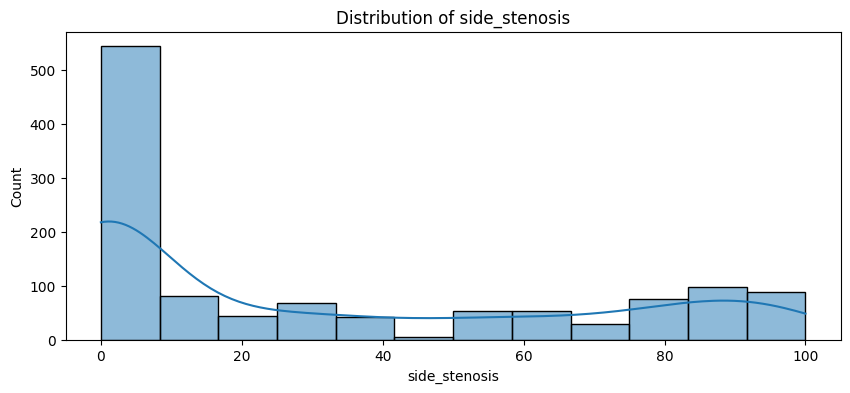

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


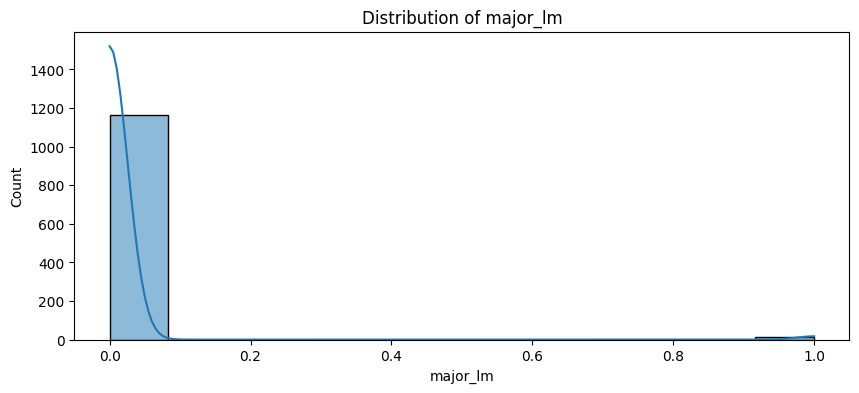

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


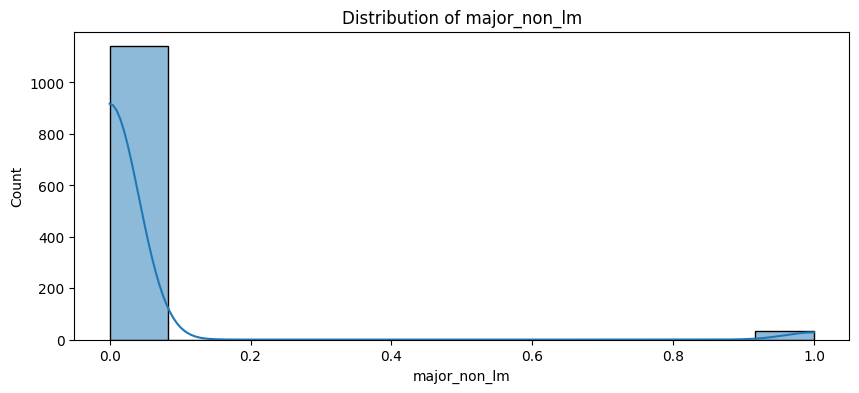

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


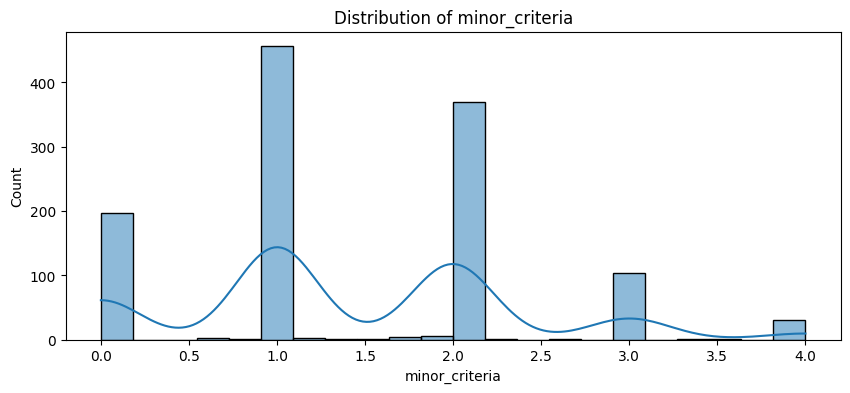

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


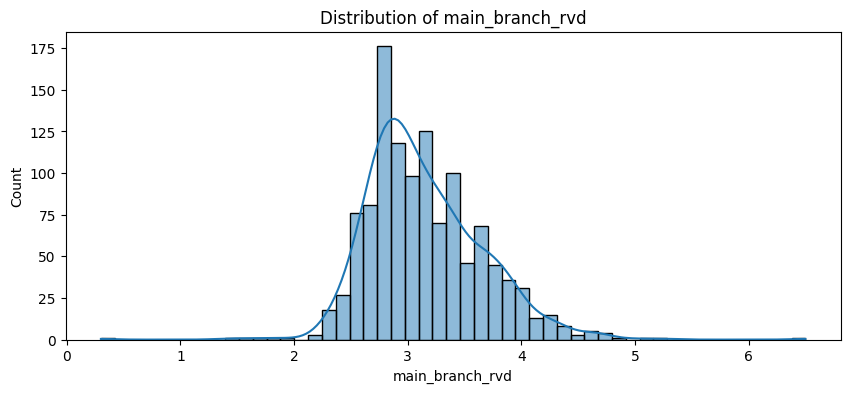

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


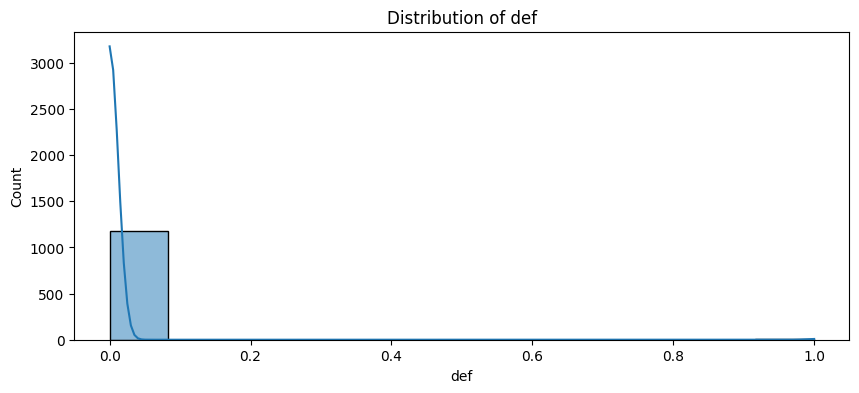

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


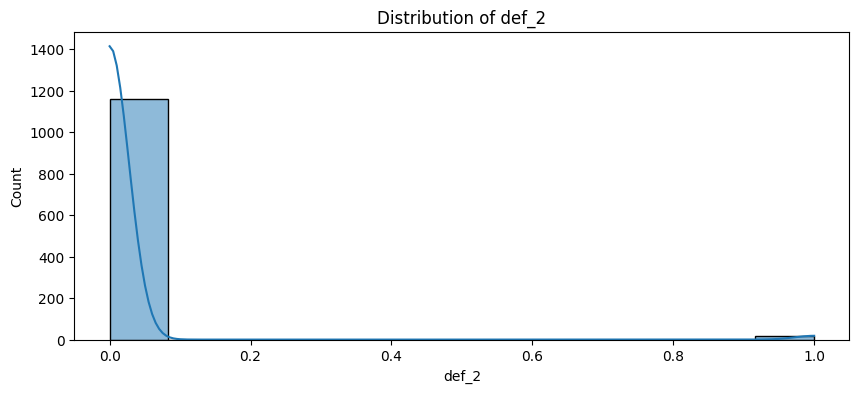

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


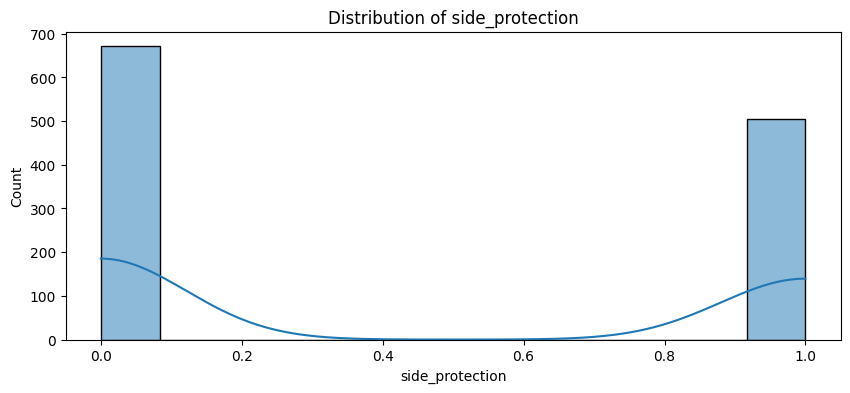

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


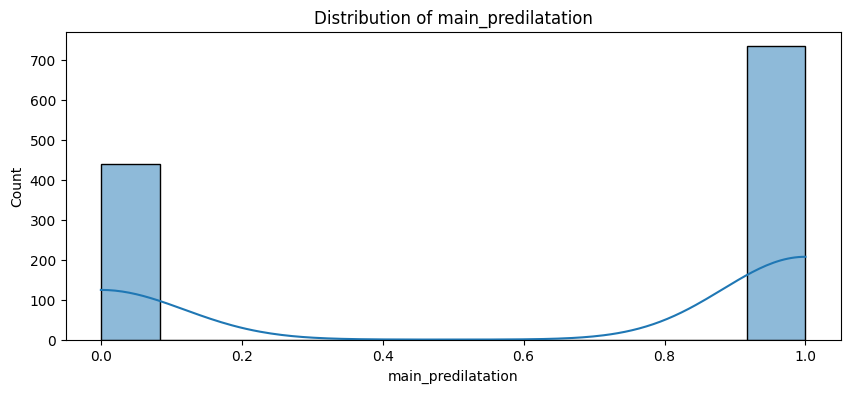

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


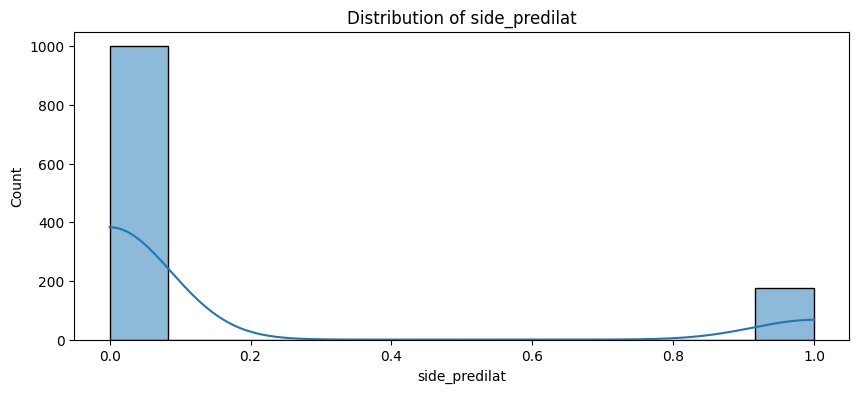

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


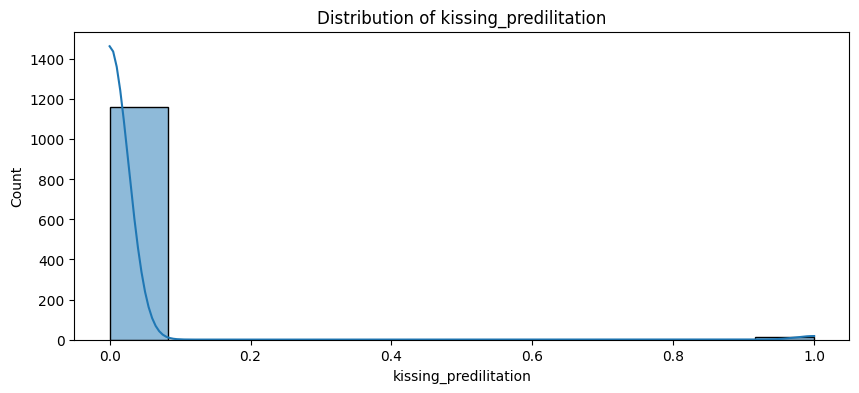

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


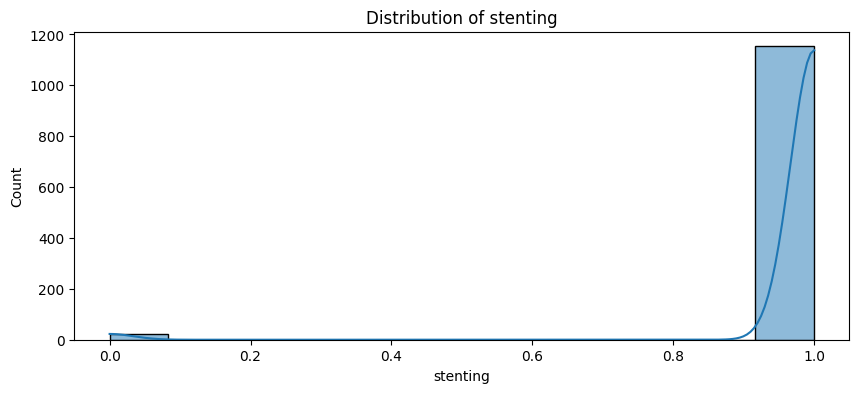

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


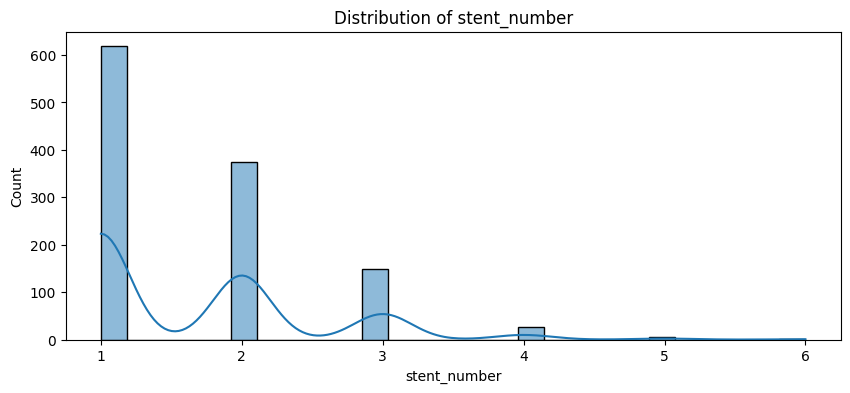

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


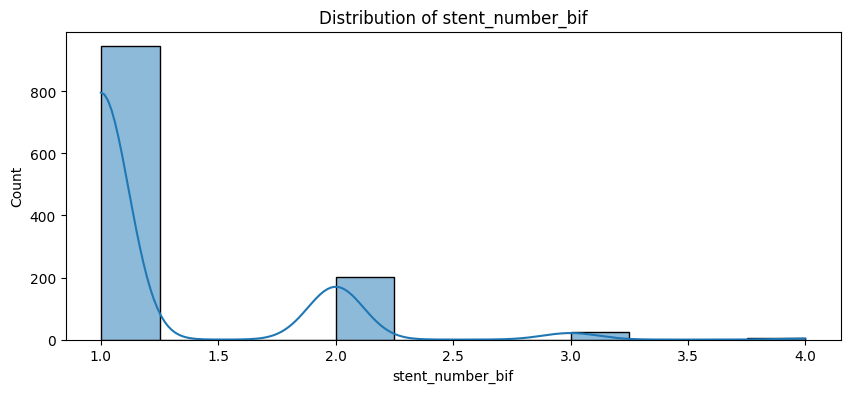

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


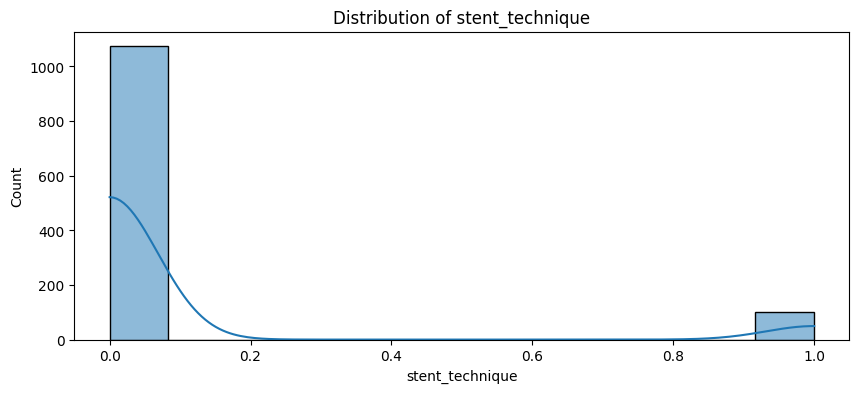

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


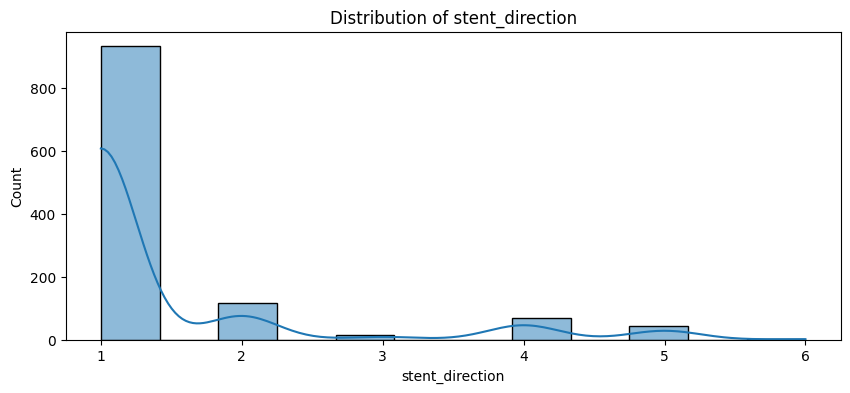

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


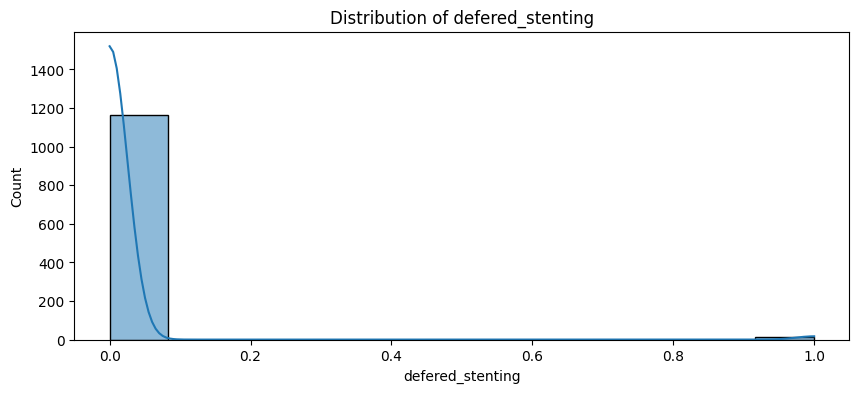

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


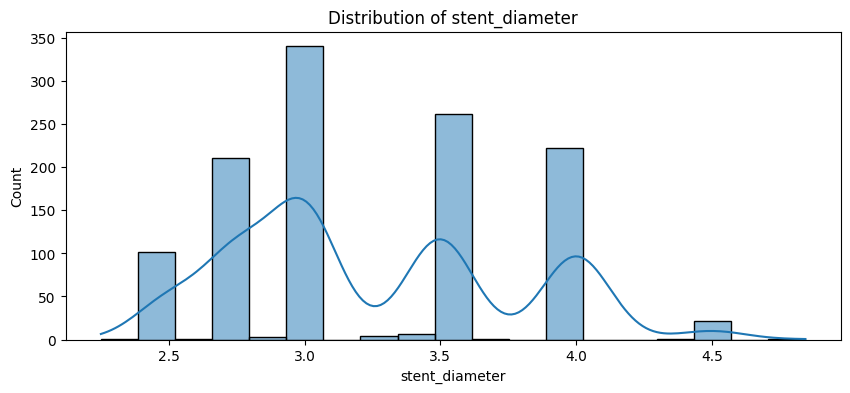

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


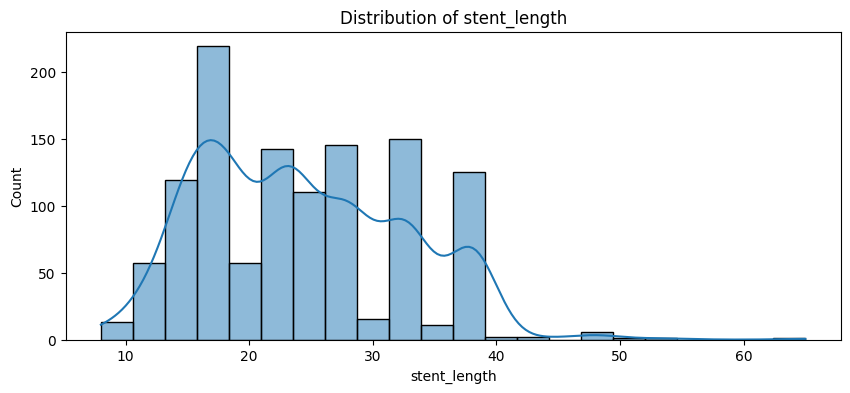

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


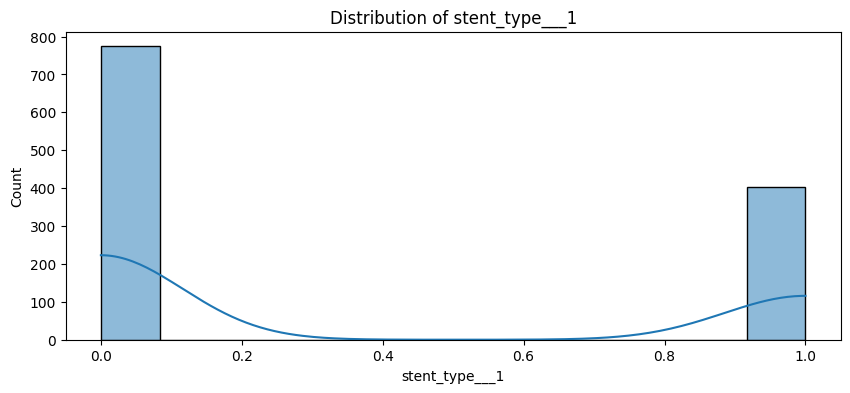

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


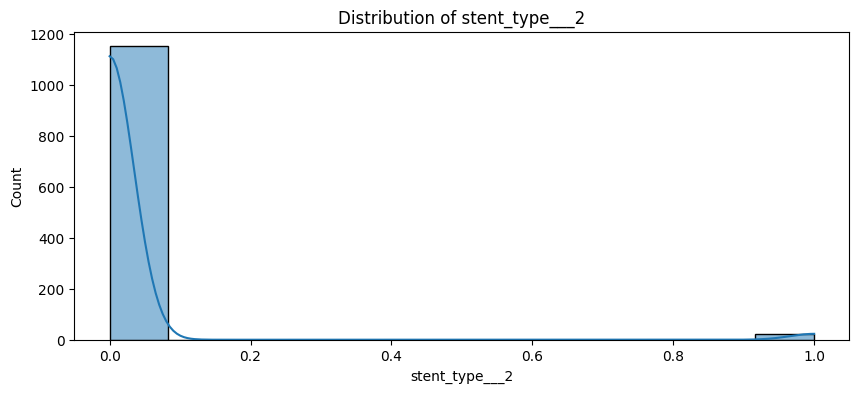

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


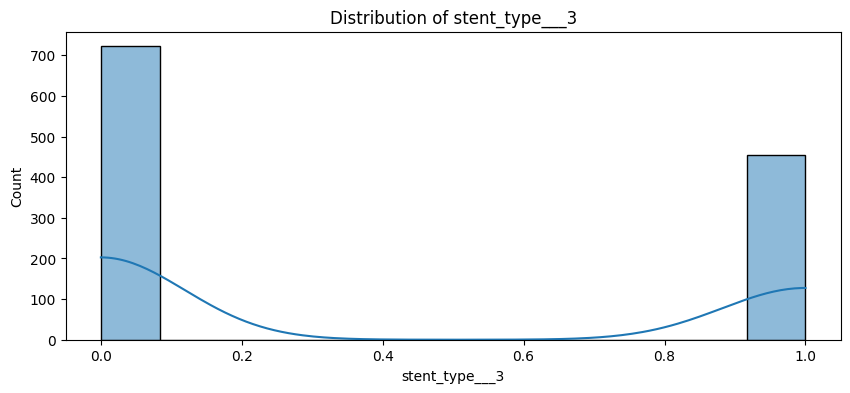

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


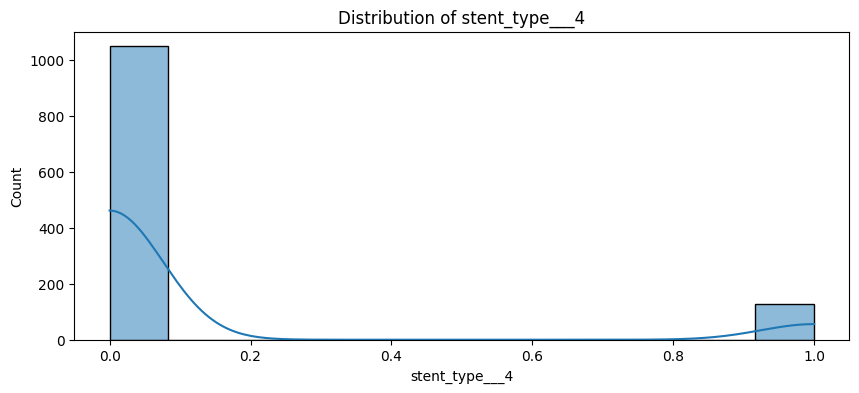

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


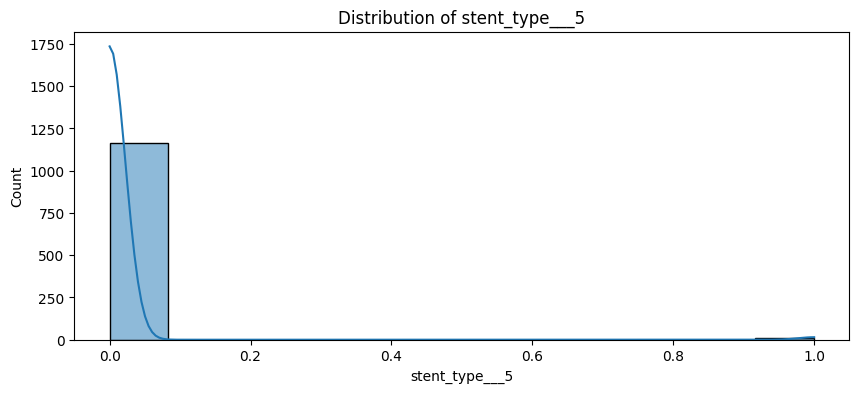

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


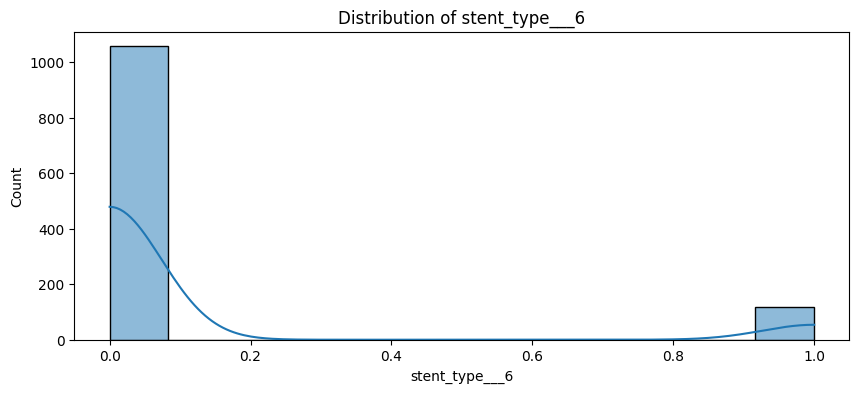

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


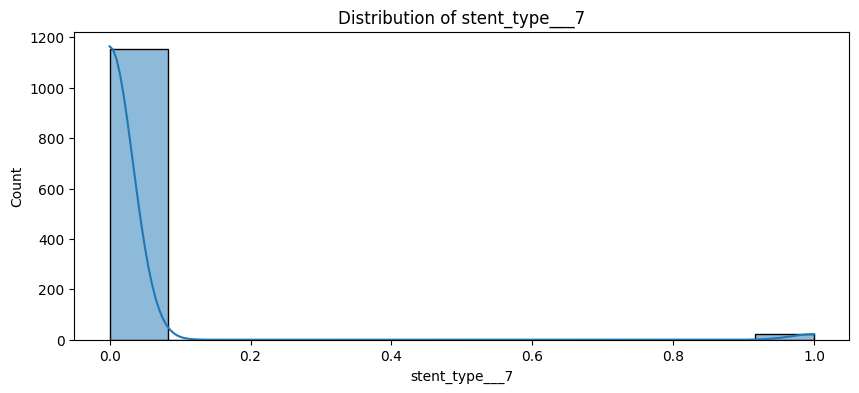

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


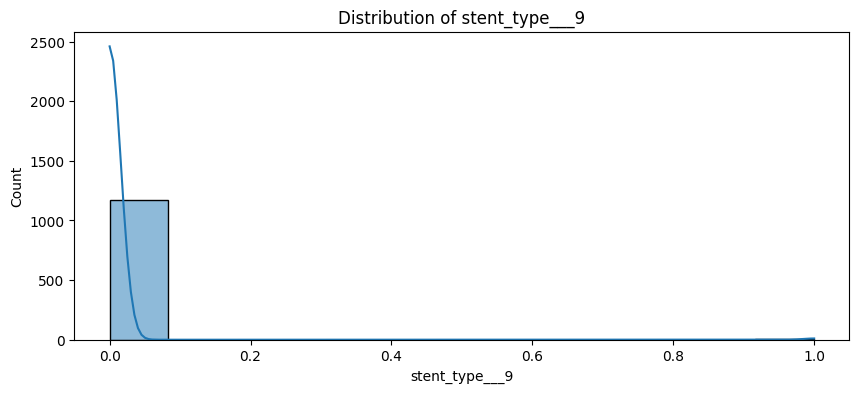

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


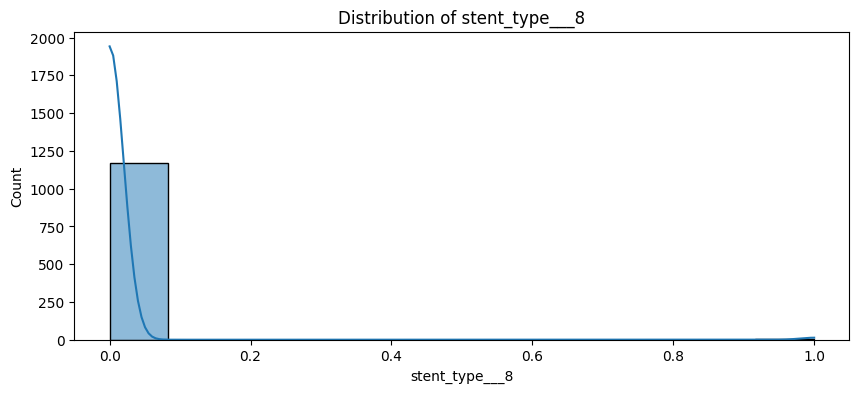

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


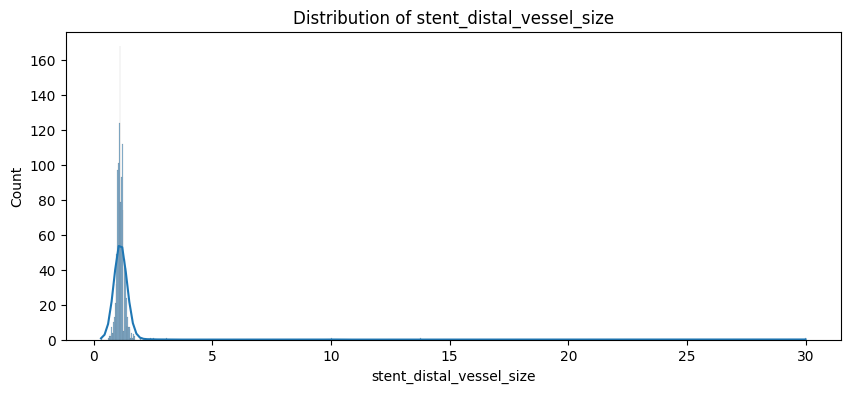

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


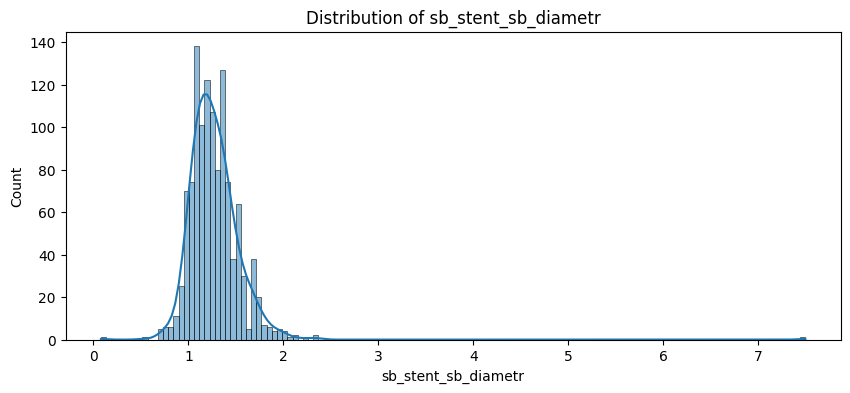

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


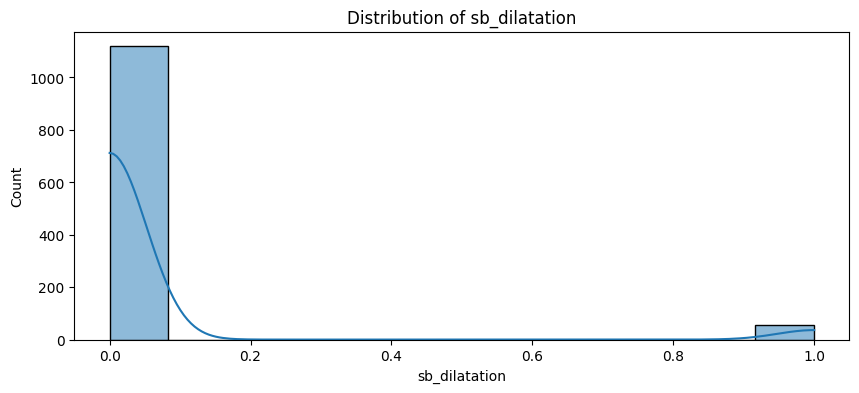

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


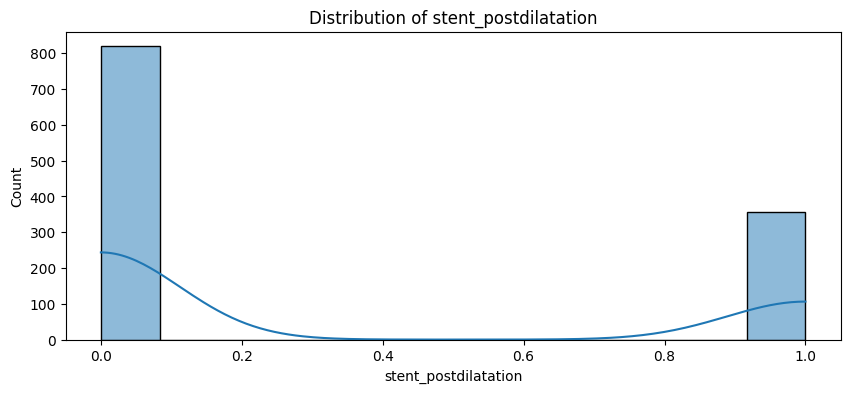

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


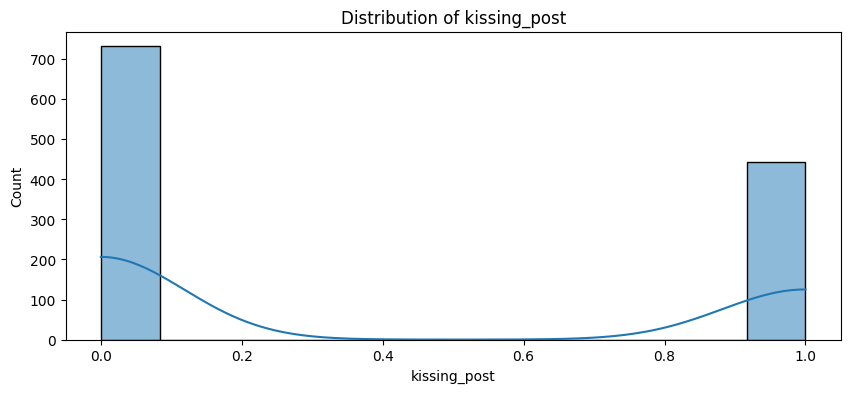

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


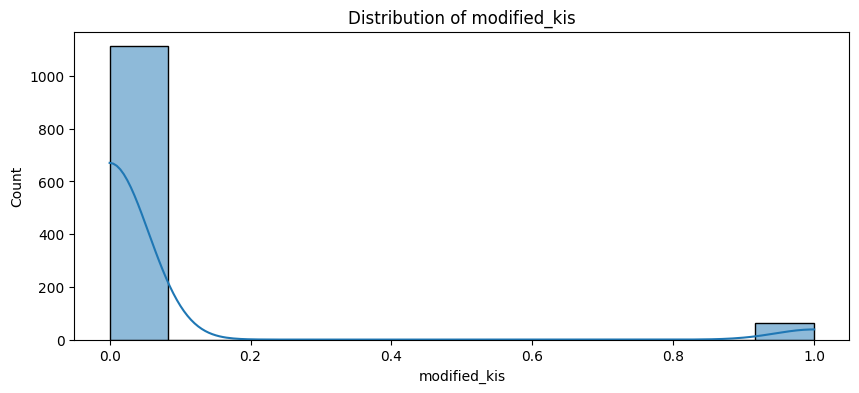

In [23]:
import seaborn as sns

for column in X_train.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
df_for_ohe = pd.concat([X_train[cathegorical], X_test[cathegorical], X_val[cathegorical]], ignore_index=True)
ohe.fit(df_for_ohe)

OneHotEncoder(sparse_output=False)

In [25]:
def process_ohe(dataframe, cat_cols, encoder):
    encoded_columns = pd.DataFrame(encoder.transform(dataframe[cat_cols]))

    encoded_columns.columns = encoder.get_feature_names_out(cat_cols)

    dataframe = pd.concat([dataframe, encoded_columns], axis=1)

    dataframe.drop(cat_cols, axis=1, inplace=True)

    return dataframe

In [26]:
X_train = process_ohe(X_train, cathegorical, ohe)
X_test = process_ohe(X_test, cathegorical, ohe)
X_val = process_ohe(X_val, cathegorical, ohe)
X_train

,age,adhoc_pci,weight,height,diabet,hypertension,smoking,dyslipidemia,anemia,atrial_fibrilation,...,stent_number_bif_3.0,stent_number_bif_4.0,stent_technique_0.0,stent_technique_1.0,stent_direction_1.0,stent_direction_2.0,stent_direction_3.0,stent_direction_4.0,stent_direction_5.0,stent_direction_6.0
0,68.0,0.0,76.000000,154.000000,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,67.0,0.0,80.000000,167.000000,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,100.000000,170.000000,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75.0,0.0,87.000000,179.000000,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,65.0,1.0,86.614613,159.897683,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,57.0,0.0,90.000000,167.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1172,59.0,1.0,75.000000,168.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1173,69.0,0.0,66.000000,170.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1174,57.0,0.0,93.000000,185.000000,2.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

feature_selector = SelectKBest(f_classif, k=40)
X_feature_selection = feature_selector.fit_transform(X_train, y_train)
X_feature_selection.shape

strong_cols = []

feature_scores = feature_selector.scores_
features = X_train.columns
features_scores_sorted = sorted(zip(features, feature_scores), key=lambda x: x[1], reverse=True)
for col in features_scores_sorted[:30]:
    strong_cols.append(col[0])

In [28]:
X_train = X_train[strong_cols]
X_test = X_test[strong_cols]
X_val = X_val[strong_cols]
X_train

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,creatinine,stent_type___5,...,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,medina_side,side_stenosis,distal_diametr,side_diametr
0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,80.000000,3.5,2.9
1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,97.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,2.5,2.3
2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,109.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,3.2,4.1
3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,168.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000000,2.8,2.3
4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,105.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,95.000000,3.3,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,106.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,3.1,3.5
1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,97.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,8.553568,2.9,2.6
1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,70.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,40.000000,3.0,2.9
1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,107.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,3.1,3.0


In [29]:
corr_matrix = X_train.corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.4

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

to_drop

['creatinine',
 'minor_criteria',
 'medina_side',
 'side_stenosis',
 'side_diametr']

In [30]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

X_train

,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,if_yes_what_type___1,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5
1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5
2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2
3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8
4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1
1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9
1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1


In [31]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1176, 25)
(392, 25)
(393, 25)


In [32]:
print(X_train.columns)

Index(['anemia', 'cerebrovascular_disease', 'ef', 'age',
       'peripheral_artery_disease', 'single_vessel', 'ckd', 'copd',
       'stent_type___5', 'if_yes_what_type___1', 'atrial_fibrilation',
       'calcium', 'mi_history', 'adhoc_pci', 'stent_length',
       'clinical_presentation_2.0', 'def', 'sb_dilatation',
       'bifurcation_location_2.0', 'trifurcation', 'stent_number_1.0',
       'main_predilatation', 'stent_type___3', 'side_predilat',
       'distal_diametr'],
      dtype='object')


# Syntetic

In [33]:
X_train_with_ID = X_train.copy().reset_index(drop=False)
X_train_with_ID

,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,clinical_presentation_2.0,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr
0,0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5
1,1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5
2,2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2
3,3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8
4,4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1
1172,1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9
1173,1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0
1174,1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1


In [34]:
X_train_with_ID_and_target = X_train_with_ID.copy()
X_train_with_ID_and_target['target'] = y_train
X_train_with_ID_and_target

,index,anemia,cerebrovascular_disease,ef,age,peripheral_artery_disease,single_vessel,ckd,copd,stent_type___5,...,def,sb_dilatation,bifurcation_location_2.0,trifurcation,stent_number_1.0,main_predilatation,stent_type___3,side_predilat,distal_diametr,target
0,0,0.0,0.0,62.0,68.0,0.0,0.0,70.982905,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0
1,1,0.0,0.0,63.0,67.0,0.0,1.0,69.345077,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.5,0
2,2,0.0,0.0,35.0,52.0,0.0,0.0,66.916820,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.2,0
3,3,0.0,0.0,55.0,75.0,0.0,1.0,33.745645,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.8,1
4,4,0.0,0.0,48.0,65.0,0.0,1.0,65.051015,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,1171,0.0,0.0,58.0,57.0,0.0,0.0,77.315887,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.1,0
1172,1172,0.0,0.0,38.0,59.0,0.0,0.0,73.353636,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.9,1
1173,1173,1.0,0.0,65.0,69.0,1.0,0.0,90.590030,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1
1174,1174,0.0,0.0,68.0,57.0,0.0,0.0,66.070134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.1,0


In [35]:
from sdv.metadata import Metadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer

metadata = Metadata.detect_from_dataframe(data=X_train_with_ID_and_target)

# Оптимизация KAN на auc-roc для 10 фолдов

In [36]:
print('KAN for classification binary 10 folds')

KAN for classification binary 10 folds


In [37]:
import torch
from kan import KAN

In [38]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
scaller.fit(X_train)

StandardScaler()

In [39]:
import joblib

joblib.dump(scaller, "./scaler.save")

['./scaler.save']

In [40]:
X_train_folds = pd.concat([X_train, X_val])
y_train_k_fold = np.concatenate((y_train, y_val), axis=0)

In [41]:
scaled_features = scaller.transform(X_train_folds)

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def resampled_with_smote(X_train, y_train, resamble_neg, resamble_pos):
    sampling_strategy = {0: int(np.bincount(y_train)[0] * resamble_neg), 1: int(np.bincount(y_train)[1] * resamble_pos)}
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

    # Генерация новых примеров
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled

# CatBoost + SMOTE

In [50]:
from __future__ import annotations

import json
import time
from dataclasses import dataclass
from functools import partial
from pathlib import Path
from typing import Any, Dict, List, Tuple

import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from simplical_smote_kdd.ssmote import BorderlineSimplicialSMOTE, SimplicialSMOTE

# ────────────────────────────────────────────────────────────────────────────────
# Types & constants
# ────────────────────────────────────────────────────────────────────────────────
MetricTuple = Tuple[float, float, float, float, float]  # roc, f1, prec, rec, acc
CHECKPOINT_FILE = Path("ss_catboost.cbm")
THRESHOLD_FILE = Path("ss_catboost_best_threshold.npy")
SCORES_FILE = Path("scores_ss_catboost.json")


# ────────────────────────────────────────────────────────────────────────────────
# Helper utilities
# ────────────────────────────────────────────────────────────────────────────────
@dataclass(frozen=True)
class FoldResult:
    roc_auc: float
    f1: float
    precision: float
    recall: float
    accuracy: float
    threshold: float


def _prepare_fold(
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
    train_idx: np.ndarray,
    test_idx: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Slice, scale, oversample and return numpy arrays."""
    # Slice --------------------------------------------------------------------
    X_train, X_val = (
        (X.iloc[train_idx].values, X.iloc[test_idx].values)
        if isinstance(X, pd.DataFrame)
        else (X[train_idx], X[test_idx])
    )
    y_train, y_val = (
        (y.iloc[train_idx].values, y.iloc[test_idx].values)
        if isinstance(y, (pd.Series, pd.DataFrame))
        else (y[train_idx], y[test_idx])
    )

    # Scale --------------------------------------------------------------------
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # SMOTE --------------------------------------------------------------------
    X_res, y_res = SimplicialSMOTE(random_state=42).fit_resample(X_train, y_train)
    return X_res, y_res, X_val, y_val


def _opt_threshold(y_true: np.ndarray, prob: np.ndarray) -> float:
    """Return threshold maximising ROC-AUC on validation fold."""
    # ROC-AUC is threshold-independent, so we'll use Youden's J statistic 
    # (sensitivity + specificity - 1) which is a point metric derived from ROC
    thresholds = np.linspace(0.1, 0.9, 20)  # More granular thresholds
    j_scores = []
    
    for t in thresholds:
        pred = (prob > t).astype(int)
        # True positive rate (sensitivity)
        tpr = np.sum((pred == 1) & (y_true == 1)) / max(1, np.sum(y_true == 1))
        # True negative rate (specificity)
        tnr = np.sum((pred == 0) & (y_true == 0)) / max(1, np.sum(y_true == 0))
        # Youden's J statistic
        j_scores.append(tpr + tnr - 1)
    
    # Return threshold that maximizes Youden's J
    return float(thresholds[int(np.argmax(j_scores))])


def _evaluate_fold(y_true: np.ndarray, prob: np.ndarray, thr: float) -> MetricTuple:
    """Return all metrics for a single fold."""
    pred = (prob > thr).astype(int)
    return (
        roc_auc_score(y_true, prob),
        f1_score(y_true, pred, zero_division=0),
        precision_score(y_true, pred, zero_division=0),
        recall_score(y_true, pred, zero_division=0),
        accuracy_score(y_true, pred),
    )


# ────────────────────────────────────────────────────────────────────────────────
# Objective
# ────────────────────────────────────────────────────────────────────────────────
def objective(
    params: Dict[str, Any],
    X: np.ndarray | pd.DataFrame,
    y: np.ndarray | pd.Series | pd.DataFrame,
) -> Dict[str, Any]:
    # Reduced from 10 to 5 folds for faster computation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    fold_results: List[FoldResult] = []
    best_model = None
    best_roc = -np.inf

    # Convert hyper-opt parameters to CatBoost format
    catboost_params = {
        'iterations': int(params['iterations']),
        'learning_rate': params['learning_rate'],
        'depth': int(params['depth']),
        'l2_leaf_reg': params['l2_leaf_reg'],
        'random_strength': params.get('random_strength', 1.0),
        'bagging_temperature': params.get('bagging_temperature', 1.0),
        'border_count': int(params.get('border_count', 128)),
        'class_weights': [params.get('weight_major', 1.0), params['weight_minor']],
        'random_seed': 42,
        'verbose': False,
        'eval_metric': 'AUC',  # Explicitly set evaluation metric to AUC
    }

    for train_idx, val_idx in kf.split(X, y):
        X_res, y_res, X_val, y_val = _prepare_fold(X, y, train_idx, val_idx)

        # Train CatBoost model
        model = CatBoostClassifier(**catboost_params)
        model.fit(
            X_res, 
            y_res, 
            eval_set=(X_val, y_val), 
            early_stopping_rounds=20,
            verbose=False,
            use_best_model=True
        )

        # Predict & evaluate
        prob = model.predict_proba(X_val)[:, 1]
        thr = _opt_threshold(y_val, prob)
        roc, f1, prec, rec, acc = _evaluate_fold(y_val, prob, thr)

        fold_results.append(FoldResult(roc, f1, prec, rec, acc, thr))

        # Select best model based on ROC-AUC
        if roc > best_roc:
            best_roc, best_model = roc, model

    # Save best model and threshold
    mean_roc = float(np.mean([fr.roc_auc for fr in fold_results]))
    if best_model:
        best_model.save_model(CHECKPOINT_FILE)
        np.save(THRESHOLD_FILE, max(fold_results, key=lambda fr: fr.roc_auc).threshold)

    # Write all metrics in one JSON file
    SCORES_FILE.write_text(
        json.dumps(
            {
                "metrics": [fr.__dict__ for fr in fold_results],
                "mean_metrics": {
                    "roc_auc": mean_roc,
                    "f1": np.mean([fr.f1 for fr in fold_results]),
                    "precision": np.mean([fr.precision for fr in fold_results]),
                    "recall": np.mean([fr.recall for fr in fold_results]),
                    "accuracy": np.mean([fr.accuracy for fr in fold_results]),
                },
                "params": catboost_params,
            },
            indent=2,
            default=lambda x: float(x) if isinstance(x, (np.float32, np.int64)) else x,  # Handle NumPy types
        )
    )

    # Tiny delay to throttle filesystem spam in notebooks
    time.sleep(1.0)
    print(f"Mean ROC-AUC={mean_roc:.4f} | params={params}")
    return {"loss": -mean_roc, "status": STATUS_OK}


# ────────────────────────────────────────────────────────────────────────────────
# Search space & execution - Reduced for less powerful hardware
# ────────────────────────────────────────────────────────────────────────────────
search_space: Dict[str, Any] = {
    "iterations": hp.quniform("iterations", 100, 1000, 50),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.3)),
    "depth": hp.quniform("depth", 4, 10, 1),
    "l2_leaf_reg": hp.loguniform("l2_leaf_reg", np.log(1), np.log(10)),
    "random_strength": hp.uniform("random_strength", 0.1, 1.0),
    "bagging_temperature": hp.uniform("bagging_temperature", 0, 1),
    "border_count": hp.quniform("border_count", 32, 255, 1),
    "weight_minor": hp.uniform("weight_minor", 1, 5),
    "weight_major": hp.uniform("weight_major", 0.1, 1),
}


def run_optimisation(X: pd.DataFrame | np.ndarray, y: pd.Series | np.ndarray) -> None:
    trials = Trials()
    best_raw: Dict[str, int | float] = fmin(
        fn=partial(objective, X=X, y=y),
        space=search_space,
        algo=tpe.suggest,
        max_evals=50,  # Reduced from 20 to 10
        trials=trials,
    )
    
    # Convert numeric parameters to integers where needed
    best_final = best_raw.copy()
    for param in ["iterations", "depth"]:
        if param in best_final:
            best_final[param] = int(best_final[param])
    
    # Add the fixed parameters to the final result
    best_final.update({
        "random_strength": 1.0,
        "bagging_temperature": 1.0,
        "border_count": 128,
        "weight_major": 1.0
    })
    
    print("Best hyper-parameters:", json.dumps(best_final, indent=2, default=lambda x: float(x)))

run_optimisation(X_train, y_train)

Mean ROC-AUC=0.7081 | params={'bagging_temperature': 0.05868791472475199, 'border_count': 230.0, 'depth': 5.0, 'iterations': 200.0, 'l2_leaf_reg': 3.2862924884679647, 'learning_rate': 0.06976126371553935, 'random_strength': 0.16012043858272781, 'weight_major': 0.3110402254724107, 'weight_minor': 4.623276312416904}
Mean ROC-AUC=0.7252 | params={'bagging_temperature': 0.16972165902174996, 'border_count': 168.0, 'depth': 6.0, 'iterations': 350.0, 'l2_leaf_reg': 7.696221585289528, 'learning_rate': 0.03090592986784842, 'random_strength': 0.6624509160843589, 'weight_major': 0.5475745721447642, 'weight_minor': 2.1039976893613566}
Mean ROC-AUC=0.7090 | params={'bagging_temperature': 0.02855923992097753, 'border_count': 69.0, 'depth': 5.0, 'iterations': 350.0, 'l2_leaf_reg': 7.245598699722142, 'learning_rate': 0.1493700212612647, 'random_strength': 0.663923995857855, 'weight_major': 0.49499523222414843, 'weight_minor': 2.4926430888894506}
Mean ROC-AUC=0.6961 | params={'bagging_temperature': 0.2

# Simplicial SMOTE

In [75]:
import importlib
import simplical_smote_kdd.ssmote.smote
importlib.reload(simplical_smote_kdd.ssmote.smote)
importlib.reload(simplical_smote_kdd.ssmote)

<module 'simplical_smote_kdd.ssmote' from '/Users/ivan.petrov/HSE/diplom/code/simplical_smote_kdd/ssmote/__init__.py'>

Test set evaluation results:
ROC AUC: 0.6363
F1 Score: 0.1323
Precision: 0.0716
Recall: 0.8621
Accuracy: 0.1654


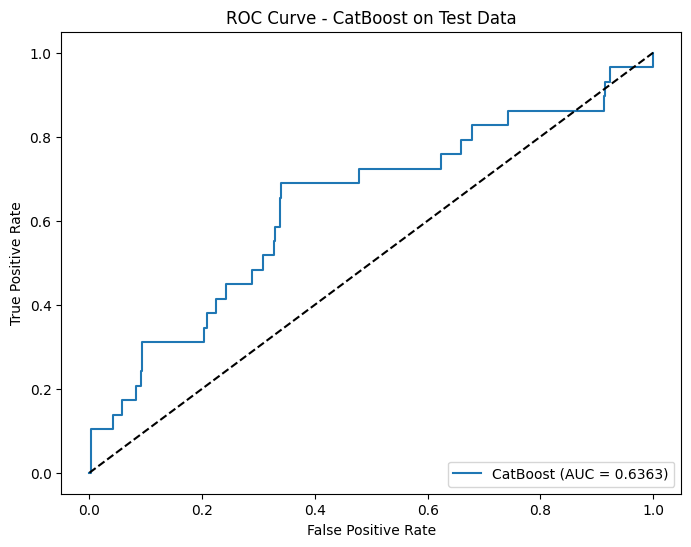

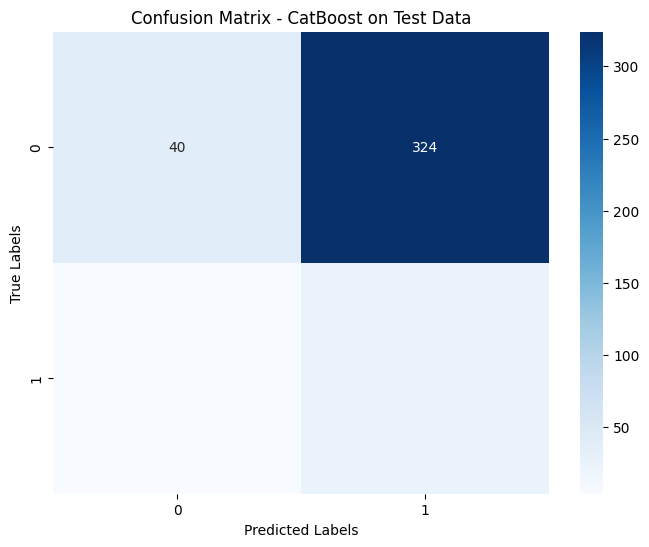

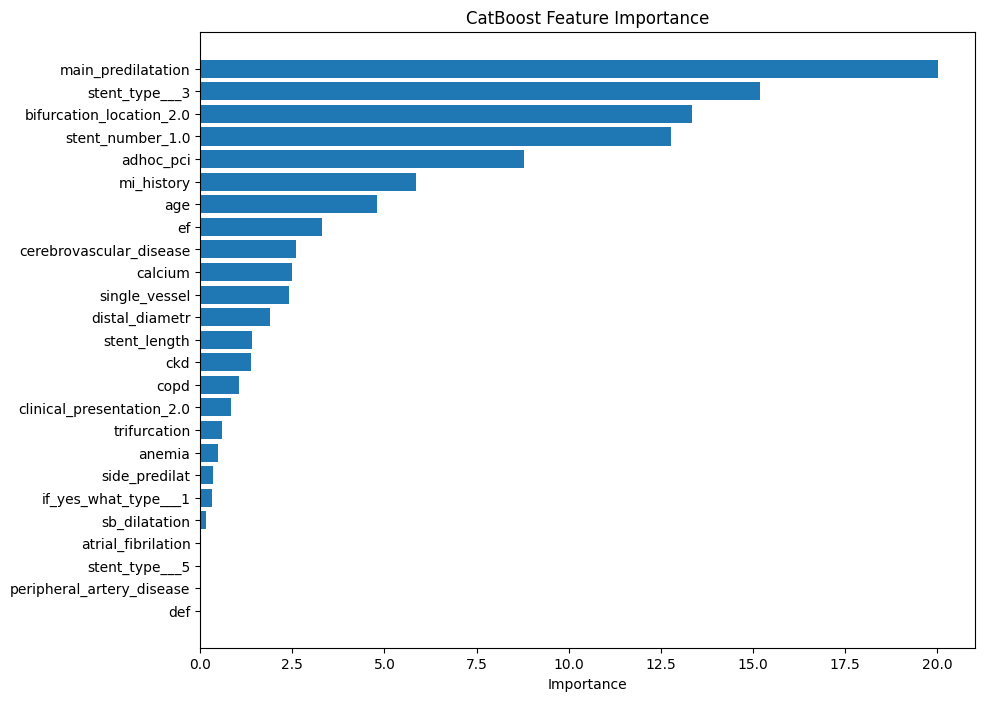

In [51]:
def evaluate_model_on_test_data():
    """
    Evaluate the best CatBoost model on test data and save results.
    """
    # Load the best model
    best_model = CatBoostClassifier()
    best_model.load_model(CHECKPOINT_FILE)  # Using the constant defined earlier
    
    # Prepare test data
    X_test_scaled = scaller.transform(X_test)
    
    # Make predictions
    pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    
    # Load best threshold (or use default 0.5 if file doesn't exist)
    threshold = 0.5
    if THRESHOLD_FILE.exists():
        threshold = float(np.load(THRESHOLD_FILE))
    
    pred_labels = (pred_prob > threshold).astype(int)
    
    # Calculate metrics
    test_roc_auc = roc_auc_score(y_test, pred_prob)
    test_f1 = f1_score(y_test, pred_labels)
    test_precision = precision_score(y_test, pred_labels)
    test_recall = recall_score(y_test, pred_labels)
    test_accuracy = accuracy_score(y_test, pred_labels)
    
    # Print results
    print("Test set evaluation results:")
    print(f"ROC AUC: {test_roc_auc:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"Accuracy: {test_accuracy:.4f}")
    
    # Save results to file
    with open('test_results_ss_catboost.txt', 'w') as file:
        file.write(f"Test ROC AUC: {test_roc_auc:.4f}\n")
        file.write(f"Test F1 Score: {test_f1:.4f}\n")
        file.write(f"Test Precision: {test_precision:.4f}\n")
        file.write(f"Test Recall: {test_recall:.4f}\n")
        file.write(f"Test Accuracy: {test_accuracy:.4f}\n")
    
    # Plot ROC curve
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'CatBoost (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - CatBoost on Test Data')
    plt.legend(loc='lower right')
    # plt.savefig('catboost_roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Plot confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix - CatBoost on Test Data')
    # plt.savefig('catboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Feature importance plot
    feature_importance = best_model.get_feature_importance()
    feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'Feature {i}' for i in range(X_test.shape[1])]
    
    # Sort features by importance
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.title('CatBoost Feature Importance')
    plt.xlabel('Importance')
    # plt.savefig('catboost_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return test_roc_auc, test_f1, test_precision, test_recall, test_accuracy

# Run the evaluation
test_metrics = evaluate_model_on_test_data()

In [46]:
space = {
    # 'resamble_neg': hp.choice('resamble_neg', range(2, 16)),
    # 'resamble_pos': hp.choice('resamble_pos', range(4, 16)),
    'grid': hp.choice('grid', range(3, 5)),
    'k': hp.choice('k', range(3, 5)),
    'steps': hp.choice('steps', range(25, 50)),
    'weight_minor': hp.uniform('weight_minor', 1, 2),
    'weight_major': hp.uniform('weight_major', 0, 1),
    'lr': hp.loguniform('lr', -4, -1)
}

In [51]:
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, trials=trials)

#Вывод лучших гиперпараметров
print("Лучшие гиперпараметры:", best)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(



checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [00:42<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.38it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.57it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  7.82it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.72it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  8.03it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.47it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:03,  7.18it/
| train_loss: 6.44e-01 | test_loss: 9.14e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [01:21<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.32it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.88it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  8.64it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  8.82it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.10it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  8.56it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  9.12it/
| train_loss: 6.27e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [02:04<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.70it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.71it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.00it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  9.13it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  9.28it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  9.38it/
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:01,  9.80it
| train_loss: 5.91e-01 | test_loss: 8.35e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:01<00:02

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [02:41<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  8.18it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  8.05it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:03,  8.36it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  7.85it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  7.88it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.47it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  8.13it/
| train_loss: 6.59e-01 | test_loss: 9.60e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [03:19<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.41it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02,  9.58it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.68it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  9.21it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  9.09it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,  7.81it/
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:02,  7.42it
| train_loss: 6.25e-01 | test_loss: 8.95e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:01<00:02

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [03:56<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.96it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02,  8.69it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  8.85it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  8.77it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  8.69it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  8.91it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:00<00:02,  9.58it/
| train_loss: 6.20e-01 | test_loss: 8.93e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:01

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [04:32<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.68it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  8.33it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.65it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.04it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  7.92it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  9.00it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,  9.22it/
| train_loss: 6.42e-01 | test_loss: 9.51e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:02

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [05:10<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:05,  4.72it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:05,  5.14it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:04,  5.41it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:04,  5.40it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:04,  5.50it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:04,  5.28it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:03,  5.72it/
| train_loss: 5.91e-01 | test_loss: 8.48e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:03,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [05:50<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.18it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  8.36it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.44it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.57it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  9.00it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.99it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  7.99it/
| train_loss: 6.26e-01 | test_loss: 9.38e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,

saving model version 0.1                              
checkpoint directory created: ./model                 
saving model version 0.0                              
  0%|          | 0/10 [06:29<?, ?trial/s, best loss=?]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  8.60it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02,  9.95it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.78it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  9.66it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  9.68it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:00<00:02,  9.57it/
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:01<00:01,  9.40it
| train_loss: 6.36e-01 | test_loss: 8.80e-01 | reg: 0.00e+00 | :  41%|4| 12/29 [00:01<00:01

saving model version 0.1                              
0.7099303617182693                                    
[0.7297633872976339, 0.6942528735632184, 0.7597701149425288, 0.5798850574712644, 0.7160919540229885, 0.7114942528735632, 0.6913793103448276, 0.789080459770115, 0.69717868338558, 0.7304075235109717]
{'grid': 3, 'k': 3, 'lr': 0.21632969803975857, 'steps': 29, 'weight_major': 0.2326886128643837, 'weight_minor': 1.4555209501580417}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [07:31<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.01it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.81it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.35it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  8.14it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.20it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.59it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  6.58it/
| train_loss: 6.54e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [08:14<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  7.08it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.41it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.07it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  8.15it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.17it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.44it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.67it/
| train_loss: 6.79e-01 | test_loss: 8.50e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [08:53<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:08,  5.41it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.84it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.40it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.67it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.86it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.58it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  7.66it/
| train_loss: 6.42e-01 | test_loss: 7.98e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [09:33<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:06,  6.87it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.78it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.34it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.40it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.58it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  7.99it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.34it/
| train_loss: 6.74e-01 | test_loss: 7.96e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [10:09<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:09,  4.86it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.57it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.12it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.74it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.78it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.17it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.37it/
| train_loss: 6.39e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [10:47<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.62it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.32it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  8.06it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:04,  8.42it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:04,  8.54it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:04,  8.19it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:04,  8.08it/
| train_loss: 6.59e-01 | test_loss: 7.48e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:00<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [11:26<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:10,  4.07it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.97it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.01it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  6.98it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.46it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.93it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:05,  7.44it/
| train_loss: 7.38e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [12:03<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:05,  7.34it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:05,  7.95it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.65it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.88it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.61it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  6.68it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.07it/
| train_loss: 6.56e-01 | test_loss: 8.49e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [12:40<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:09,  4.47it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:07,  5.64it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:06,  6.43it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.11it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:06,  5.99it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:01<00:06,  5.81it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:01<00:06,  6.29it/
| train_loss: 6.30e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:05,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 10%|█         | 1/10 [13:16<1:01:58, 413.15s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/45 [00:00<?, ?it/s]
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :   0%|       | 0/45 [00:00<?, ?it/s]
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :   2%| | 1/45 [00:00<00:08,  5.38it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :   4%| | 2/45 [00:00<00:06,  6.56it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :   7%| | 3/45 [00:00<00:05,  7.37it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :   9%| | 4/45 [00:00<00:05,  7.57it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  11%|1| 5/45 [00:00<00:05,  7.83it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  13%|1| 6/45 [00:00<00:05,  7.18it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  16%|1| 7/45 [00:00<00:05,  7.51it/
| train_loss: 6.93e-01 | test_loss: 8.14e-01 | reg: 0.00e+00 | :  18%|1| 8/45 [00:01<00:04,

saving model version 0.1                                                            
0.6649463219822218                                                                  
[0.5323785803237858, 0.6310344827586207, 0.6879310344827587, 0.6074712643678161, 0.6528735632183907, 0.8166666666666667, 0.664367816091954, 0.7206896551724138, 0.6915360501567398, 0.6445141065830722]
{'grid': 4, 'k': 4, 'lr': 0.1468401341886588, 'steps': 45, 'weight_major': 0.5487716245248894, 'weight_minor': 1.7410131589529798}
checkpoint directory created: ./model                                               
saving model version 0.0                                                          
 20%|██        | 2/10 [14:13<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:06,  4.74it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:05,  5.32it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.03it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  6.27it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:04,  6.33it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.19it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:04,  5.76it/
| train_loss: 7.27e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:04,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [14:49<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  6.28it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.77it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.81it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  7.12it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:03,  7.07it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.74it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:03,  6.96it/
| train_loss: 6.79e-01 | test_loss: 8.24e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [15:28<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:05,  5.87it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:04,  6.92it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:04,  6.92it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:00<00:04,  7.24it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:00<00:03,  7.08it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:00<00:04,  6.67it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:03,  6.77it/
| train_loss: 7.04e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:01<00:03,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [31:38<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:08,  3.72it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:08,  3.58it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:08,  3.54it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:07,  3.73it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:07,  3.82it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:07,  3.63it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:01<00:07,  3.71it/
| train_loss: 6.85e-01 | test_loss: 7.86e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:02<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [32:32<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:10,  3.17it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:09,  3.11it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:00<00:08,  3.39it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:08,  3.35it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:07,  3.57it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:01<00:07,  3.47it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:02<00:07,  3.45it/
| train_loss: 6.60e-01 | test_loss: 8.79e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:02<00:06,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [33:42<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:11,  2.79it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:11,  2.73it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:01<00:10,  3.00it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:11,  2.47it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:10,  2.63it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:02<00:10,  2.58it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:02<00:09,  2.65it/
| train_loss: 7.41e-01 | test_loss: 8.63e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:03<00:09,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [34:56<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:12,  2.47it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:11,  2.60it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:01<00:11,  2.56it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:10,  2.74it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:10,  2.72it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:02<00:10,  2.54it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:02<00:10,  2.59it/
| train_loss: 6.89e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:03<00:09,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [36:12<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:14,  2.14it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:12,  2.53it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:01<00:11,  2.56it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:11,  2.62it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:01<00:10,  2.68it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:02<00:11,  2.33it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:02<00:10,  2.37it/
| train_loss: 6.77e-01 | test_loss: 9.02e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:03<00:10,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [37:43<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:17,  1.81it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:01<00:16,  1.86it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:01<00:16,  1.86it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:02<00:15,  1.82it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:02<00:14,  1.95it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:03<00:13,  1.95it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:03<00:13,  1.98it/
| train_loss: 6.60e-01 | test_loss: 8.47e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:04<00:12,

saving model version 0.1                                                          
checkpoint directory created: ./model                                             
saving model version 0.0                                                          
 20%|██        | 2/10 [39:25<54:44, 410.60s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/33 [00:00<?, ?it/s]
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :   0%|       | 0/33 [00:00<?, ?it/s]
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :   3%| | 1/33 [00:00<00:16,  1.99it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :   6%| | 2/33 [00:00<00:14,  2.15it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :   9%| | 3/33 [00:01<00:13,  2.22it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :  12%|1| 4/33 [00:01<00:13,  2.17it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :  15%|1| 5/33 [00:02<00:13,  2.02it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :  18%|1| 6/33 [00:02<00:14,  1.90it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :  21%|2| 7/33 [00:03<00:13,  1.99it/
| train_loss: 7.12e-01 | test_loss: 8.55e-01 | reg: 0.00e+00 | :  24%|2| 8/33 [00:03<00:12,

saving model version 0.1                                                          
0.7084518543965874                                                                
[0.6917808219178082, 0.6971264367816092, 0.7844827586206896, 0.7293103448275862, 0.6994252873563218, 0.7764367816091955, 0.6873563218390805, 0.6091954022988506, 0.6915360501567398, 0.7178683385579938]
{'grid': 4, 'k': 4, 'lr': 0.020374278720093925, 'steps': 33, 'weight_major': 0.3298174167334592, 'weight_minor': 1.1725999262799927}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [41:26<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:13,  1.94it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:11,  2.09it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:10,  2.19it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:10,  2.10it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:09,  2.22it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:09,  2.24it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:08,  2.28it/
| train_loss: 6.74e-01 | test_loss: 7.80e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [43:05<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:11,  2.28it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:10,  2.31it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:10,  2.29it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:10,  2.16it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:11,  1.99it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:10,  1.92it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:09,  2.03it/
| train_loss: 6.87e-01 | test_loss: 8.44e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [44:48<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:12,  2.14it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:12,  2.06it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:10,  2.22it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:10,  2.15it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:10,  2.07it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:10,  1.96it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:09,  2.04it/
| train_loss: 6.97e-01 | test_loss: 7.75e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:09,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [46:31<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:14,  1.85it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:01<00:13,  1.80it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:13,  1.83it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:02<00:12,  1.79it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:12,  1.70it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:03<00:14,  1.40it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:04<00:13,  1.46it/
| train_loss: 7.16e-01 | test_loss: 8.30e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:05<00:13,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [48:20<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:10,  2.45it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:01<00:12,  1.94it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:11,  2.01it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:10,  2.21it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:09,  2.25it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:09,  2.12it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:09,  2.15it/
| train_loss: 7.04e-01 | test_loss: 7.58e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:08,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [49:59<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:11,  2.23it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:12,  2.01it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:12,  1.88it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:02<00:11,  1.99it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:10,  2.05it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:10,  2.09it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:10,  1.99it/
| train_loss: 7.48e-01 | test_loss: 8.17e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:09,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [51:44<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:13,  1.97it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:11,  2.21it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:01<00:10,  2.21it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:01<00:10,  2.16it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:02<00:10,  2.15it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:02<00:09,  2.12it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:03<00:09,  2.13it/
| train_loss: 7.15e-01 | test_loss: 8.15e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:03<00:09,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [53:05<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  5.49it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:05,  4.30it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:05,  4.67it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.19it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  5.57it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.45it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.80it/
| train_loss: 6.84e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:03,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [53:50<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:05,  5.14it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:04,  5.51it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:04,  5.73it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:04,  5.54it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  5.72it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:01<00:04,  4.64it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:04,  4.36it/
| train_loss: 6.99e-01 | test_loss: 8.02e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:04,

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 30%|███       | 3/10 [54:34<1:50:12, 944.71s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/27 [00:00<?, ?it/s]
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   0%|       | 0/27 [00:00<?, ?it/s]
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   4%| | 1/27 [00:00<00:04,  5.89it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :   7%| | 2/27 [00:00<00:03,  6.78it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  11%|1| 3/27 [00:00<00:03,  7.12it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  15%|1| 4/27 [00:00<00:03,  7.46it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  19%|1| 5/27 [00:00<00:03,  6.43it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  22%|2| 6/27 [00:00<00:03,  6.46it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  26%|2| 7/27 [00:01<00:02,  6.98it/
| train_loss: 7.35e-01 | test_loss: 7.88e-01 | reg: 0.00e+00 | :  30%|2| 8/27 [00:01<00:02,

saving model version 0.1                                                            
0.6772775940796725                                                                  
[0.5990037359900374, 0.5913793103448276, 0.7327586206896551, 0.5747126436781609, 0.7408045977011494, 0.7419540229885058, 0.6683908045977011, 0.6867816091954023, 0.6777429467084639, 0.7592476489028214]
{'grid': 3, 'k': 4, 'lr': 0.03126719635259899, 'steps': 27, 'weight_major': 0.6585505734325118, 'weight_minor': 1.6249857786175403}
checkpoint directory created: ./model                                               
saving model version 0.0                                                            
 40%|████      | 4/10 [55:29<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  8.39it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02, 10.22it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.35it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:03,  7.62it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  6.39it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:03,  6.27it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,  7.63it/
| train_loss: 6.61e-01 | test_loss: 8.22e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:02

saving model version 0.1                                                            
checkpoint directory created: ./model                                               
saving model version 0.0                                                              
 40%|████      | 4/10 [1:12:33<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:02,  9.58it/
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02, 11.68it/
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:01, 12.05it/
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:01, 12.14it/
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:00<00:01, 12.32it/
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:00<00:01, 11.58it
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  45%|4| 13/29 [00:01<00:01,  9.39it
| train_loss: 6.67e-01 | test_loss: 7.78e-01 | reg: 0.00e+00 | :  52%|5| 15/29 [00:01<00:01

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:13:08<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:05,  5.09it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:04,  5.90it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:04,  6.08it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:03,  6.37it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:03,  7.33it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  7.87it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,  8.19it/
| train_loss: 6.38e-01 | test_loss: 7.85e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:02

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:31:11<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  8.19it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02,  8.83it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.78it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  9.35it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:00<00:02,  9.76it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:00<00:02,  9.79it/
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:01,  9.80it
| train_loss: 7.19e-01 | test_loss: 8.90e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:01<00:02

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:31:49<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:03,  7.03it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:02,  9.13it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:00<00:02,  9.03it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  7.67it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:03,  7.29it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:02,  7.88it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:01<00:02,  7.01it/
| train_loss: 6.75e-01 | test_loss: 8.34e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:02

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:32:28<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:04,  6.12it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:03,  7.86it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:02,  9.27it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:00<00:02,  8.87it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:00<00:02,  9.05it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  31%|3| 9/29 [00:00<00:02,  9.55it/
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  34%|3| 10/29 [00:01<00:01,  9.63it
| train_loss: 6.67e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  38%|3| 11/29 [00:01<00:01

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:33:08<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:06,  4.50it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:04,  5.43it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:04,  5.42it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:05,  4.60it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:01<00:05,  4.69it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:05,  4.45it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:04,  5.16it/
| train_loss: 6.91e-01 | test_loss: 8.75e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:34:09<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:08,  3.36it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:06,  4.15it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:06,  4.28it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:05,  4.43it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:01<00:05,  4.61it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:05,  4.01it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:05,  4.32it/
| train_loss: 6.41e-01 | test_loss: 8.01e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:04,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:35:10<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:07,  3.57it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:06,  4.08it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:05,  4.38it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:05,  4.24it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:01<00:05,  4.40it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:06,  3.61it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:05,  3.78it/
| train_loss: 6.78e-01 | test_loss: 8.56e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:05,

saving model version 0.1                                                              
checkpoint directory created: ./model                                                 
saving model version 0.0                                                              
 40%|████      | 4/10 [1:36:19<1:32:35, 925.84s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/29 [00:00<?, ?it/s]
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/29 [00:00<?, ?it/s]
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   3%| | 1/29 [00:00<00:07,  3.56it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 2/29 [00:00<00:06,  4.10it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  10%|1| 3/29 [00:00<00:06,  4.06it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  14%|1| 4/29 [00:00<00:05,  4.26it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  17%|1| 5/29 [00:01<00:05,  4.39it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  21%|2| 6/29 [00:01<00:05,  4.14it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  24%|2| 7/29 [00:01<00:05,  3.84it/
| train_loss: 6.86e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  28%|2| 8/29 [00:01<00:05,

saving model version 0.1                                                              
0.7046742102174318                                                                    
[0.7148194271481942, 0.7149425287356322, 0.7494252873563217, 0.5758620689655173, 0.6913793103448276, 0.6873563218390805, 0.693103448275862, 0.7885057471264367, 0.696551724137931, 0.7347962382445141]
{'grid': 4, 'k': 3, 'lr': 0.1445873127079592, 'steps': 29, 'weight_major': 0.35551340091118055, 'weight_minor': 1.2791277011649642}
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:37:45<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:08,  2.85it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:06,  3.52it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:07,  3.15it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:05,  3.79it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:05,  3.85it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:01<00:05,  3.56it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:01<00:05,  3.77it/
| train_loss: 5.17e-01 | test_loss: 9.57e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:04,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:38:53<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:07,  3.26it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:07,  3.38it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:06,  3.43it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:06,  3.39it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:06,  3.20it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:01<00:06,  3.11it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:06,  3.13it/
| train_loss: 5.34e-01 | test_loss: 9.48e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:05,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:40:06<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:07,  3.15it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:06,  3.54it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:06,  3.45it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:06,  3.30it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:06,  3.09it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:01<00:06,  3.13it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:06,  2.98it/
| train_loss: 5.36e-01 | test_loss: 8.99e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:05,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:41:23<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:07,  3.30it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:06,  3.83it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:05,  4.02it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:07,  3.06it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:06,  3.08it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:01<00:07,  2.77it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:06,  2.97it/
| train_loss: 5.13e-01 | test_loss: 8.70e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:05,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:42:45<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:08,  3.02it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:07,  3.16it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:06,  3.51it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:06,  3.42it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:06,  3.36it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:01<00:06,  3.22it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:06,  2.92it/
| train_loss: 5.11e-01 | test_loss: 8.32e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:05,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:44:14<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:12,  2.05it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:10,  2.33it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:01<00:09,  2.42it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:08,  2.52it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:02<00:08,  2.43it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:02<00:09,  2.21it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:03<00:08,  2.26it/
| train_loss: 4.96e-01 | test_loss: 8.77e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:03<00:07,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:45:43<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:08,  2.89it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:06,  3.47it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:07,  3.26it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:07,  3.05it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:07,  2.74it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:02<00:07,  2.59it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:07,  2.66it/
| train_loss: 5.16e-01 | test_loss: 8.41e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:06,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:47:14<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:10,  2.35it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:08,  2.68it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:01<00:08,  2.70it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:09,  2.44it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:08,  2.61it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:02<00:08,  2.46it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:07,  2.65it/
| train_loss: 5.36e-01 | test_loss: 9.07e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:03<00:06,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:48:40<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:07,  3.23it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:06,  3.44it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:06,  3.33it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:07,  2.77it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:08,  2.62it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:02<00:08,  2.42it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:07,  2.60it/
| train_loss: 5.21e-01 | test_loss: 9.39e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:06,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 50%|█████     | 5/10 [1:50:14<2:04:40, 1496.18s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/26 [00:00<?, ?it/s]
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :   0%|       | 0/26 [00:00<?, ?it/s]
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :   4%| | 1/26 [00:00<00:09,  2.64it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :   8%| | 2/26 [00:00<00:07,  3.04it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  12%|1| 3/26 [00:00<00:07,  3.17it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  15%|1| 4/26 [00:01<00:08,  2.64it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  19%|1| 5/26 [00:01<00:08,  2.59it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  23%|2| 6/26 [00:02<00:07,  2.61it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  27%|2| 7/26 [00:02<00:07,  2.65it/
| train_loss: 4.85e-01 | test_loss: 8.21e-01 | reg: 0.00e+00 | :  31%|3| 8/26 [00:02<00:06,

saving model version 0.1                                                               
0.7083263909763674                                                                     
[0.5479452054794521, 0.6028735632183908, 0.7988505747126438, 0.6258620689655172, 0.825287356321839, 0.717816091954023, 0.7735632183908046, 0.746551724137931, 0.6213166144200627, 0.8231974921630093]
{'grid': 4, 'k': 3, 'lr': 0.10205826331394795, 'steps': 26, 'weight_major': 0.1505611997680001, 'weight_minor': 1.9094715449398287}
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [1:52:04<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:23,  1.40it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:18,  1.76it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:16,  1.87it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:15,  1.98it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:14,  2.02it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:13,  2.02it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:13,  2.03it/
| train_loss: 5.51e-01 | test_loss: 9.45e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [1:53:41<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:16,  1.99it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:14,  2.17it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  2.04it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:01<00:15,  1.97it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:14,  2.02it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:02<00:14,  2.00it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:13,  1.97it/
| train_loss: 5.87e-01 | test_loss: 9.15e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:03<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [1:55:25<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:27,  1.20it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:20,  1.58it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:18,  1.71it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:17,  1.75it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:15,  1.84it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:16,  1.74it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:04<00:14,  1.83it/
| train_loss: 5.80e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:13,

saving model version 0.1                                                               
 60%|██████    | 6/10 [1:55:44<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

/Users/ivan.petrov/HSE/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [1:57:15<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:17,  1.89it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:15,  2.07it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  1.98it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  12%|1| 4/34 [00:01<00:14,  2.02it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:14,  2.06it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:14,  1.95it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:13,  2.04it/
| train_loss: 5.70e-01 | test_loss: 1.02e+00 | reg: 0.00e+00 | :  24%|2| 8/34 [00:03<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [1:58:56<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:16,  1.95it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:14,  2.17it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  2.01it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:15,  1.92it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:15,  1.92it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:14,  1.99it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:13,  2.05it/
| train_loss: 5.51e-01 | test_loss: 8.72e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:03<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [2:00:40<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:17,  1.86it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:16,  1.90it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  1.97it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:01<00:14,  2.06it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:14,  2.04it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:14,  2.00it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:14,  1.92it/
| train_loss: 6.01e-01 | test_loss: 9.35e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [2:02:23<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:19,  1.70it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:16,  1.98it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:18,  1.70it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:17,  1.71it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:16,  1.81it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:15,  1.82it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:14,  1.85it/
| train_loss: 5.64e-01 | test_loss: 9.21e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:14,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [2:04:05<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:17,  1.93it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:00<00:15,  2.11it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  2.00it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:16,  1.86it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:16,  1.80it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:17,  1.65it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:04<00:16,  1.60it/
| train_loss: 5.48e-01 | test_loss: 9.28e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:15,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [2:05:48<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:17,  1.92it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:16,  1.92it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:15,  2.04it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:01<00:14,  2.03it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:14,  2.07it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:14,  1.98it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:13,  1.99it/
| train_loss: 5.27e-01 | test_loss: 8.94e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:03<00:12,

saving model version 0.1                                                               
checkpoint directory created: ./model                                                  
saving model version 0.0                                                               
 60%|██████    | 6/10 [2:07:35<1:24:49, 1272.46s/trial, best loss: -0.7099303617182693]

description:   0%|                                                           | 0/34 [00:00<?, ?it/s]
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :   0%|       | 0/34 [00:00<?, ?it/s]
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :   3%| | 1/34 [00:00<00:22,  1.50it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :   6%| | 2/34 [00:01<00:21,  1.46it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :   9%| | 3/34 [00:01<00:18,  1.67it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :  12%|1| 4/34 [00:02<00:16,  1.79it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :  15%|1| 5/34 [00:02<00:15,  1.88it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :  18%|1| 6/34 [00:03<00:15,  1.87it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :  21%|2| 7/34 [00:03<00:14,  1.91it/
| train_loss: 5.50e-01 | test_loss: 8.71e-01 | reg: 0.00e+00 | :  24%|2| 8/34 [00:04<00:12,

saving model version 0.1                                                               
0.7363113897596657                                                                     
[0.7272727272727273, 0.728735632183908, 0.8350574712643678, 0.5229885057471264, 0.771264367816092, 0.8247126436781609, 0.674712643678161, 0.7517241379310344, 0.7178683385579938, 0.8087774294670846]
{'grid': 4, 'k': 4, 'lr': 0.05867354715205783, 'steps': 34, 'weight_major': 0.15618653783469894, 'weight_minor': 1.5306573752844517}
checkpoint directory created: ./model                                                  
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:09:37<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:08,  3.33it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:08,  3.53it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.38it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:07,  3.41it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:07,  3.35it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:07,  3.18it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.32it/
| train_loss: 6.13e-01 | test_loss: 6.88e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:06,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:11:15<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:13,  2.20it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:10,  2.74it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:01<00:09,  2.92it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.15it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:08,  3.18it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:07,  3.14it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.06it/
| train_loss: 7.08e-01 | test_loss: 7.46e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:12:52<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:09,  3.08it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:09,  3.13it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.28it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.28it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:07,  3.28it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:08,  3.00it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:09,  2.63it/
| train_loss: 7.05e-01 | test_loss: 7.18e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:14:32<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:11,  2.68it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:09,  3.05it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:09,  3.10it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.12it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:07,  3.27it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:07,  3.22it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.05it/
| train_loss: 6.58e-01 | test_loss: 6.73e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:16:06<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:09,  3.19it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:09,  3.15it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.26it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.23it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:08,  3.07it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:08,  3.07it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.09it/
| train_loss: 6.55e-01 | test_loss: 6.58e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:17:44<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:09,  3.21it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:08,  3.25it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.27it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.04it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:10,  2.59it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:02<00:09,  2.63it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:08,  2.72it/
| train_loss: 6.31e-01 | test_loss: 6.43e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:19:24<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:09,  3.19it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:10,  2.78it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:01<00:09,  2.84it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:09,  2.75it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:10,  2.45it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:02<00:10,  2.39it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:09,  2.42it/
| train_loss: 6.54e-01 | test_loss: 6.68e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:03<00:09,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:21:13<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:10,  2.91it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:08,  3.24it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.27it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:08,  3.12it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:08,  3.21it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:08,  3.03it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.14it/
| train_loss: 7.01e-01 | test_loss: 7.66e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:22:43<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:08,  3.54it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:07,  3.78it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:07,  3.77it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:07,  3.81it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:08,  3.17it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:08,  3.06it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:07,  3.22it/
| train_loss: 6.91e-01 | test_loss: 7.39e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 70%|███████   | 7/10 [2:24:19<59:57, 1199.22s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/31 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   0%|       | 0/31 [00:00<?, ?it/s]
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   3%| | 1/31 [00:00<00:09,  3.33it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :   6%| | 2/31 [00:00<00:08,  3.23it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  10%| | 3/31 [00:00<00:08,  3.35it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  13%|1| 4/31 [00:01<00:07,  3.38it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  16%|1| 5/31 [00:01<00:08,  3.08it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  19%|1| 6/31 [00:01<00:08,  2.91it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  23%|2| 7/31 [00:02<00:08,  2.99it/
| train_loss: 6.64e-01 | test_loss: 6.35e-01 | reg: 0.00e+00 | :  26%|2| 8/31 [00:02<00:07,

saving model version 0.1                                                             
0.6559415840025193                                                                   
[0.6650062266500623, 0.6816091954022989, 0.6643678160919539, 0.5908045977011493, 0.7224137931034483, 0.7224137931034482, 0.6097701149425288, 0.5287356321839081, 0.631974921630094, 0.742319749216301]
{'grid': 4, 'k': 3, 'lr': 0.14474184093939294, 'steps': 31, 'weight_major': 0.9842646148996279, 'weight_minor': 1.522822399504523}
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:26:14<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:12,  2.19it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:10,  2.39it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:10,  2.29it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:09,  2.42it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:02<00:09,  2.55it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:08,  2.46it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:02<00:08,  2.41it/
| train_loss: 6.80e-01 | test_loss: 6.62e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:27:52<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:12,  2.11it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:10,  2.39it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:11,  2.13it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:10,  2.29it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:02<00:09,  2.31it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:09,  2.30it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:03<00:09,  2.18it/
| train_loss: 6.82e-01 | test_loss: 6.99e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:09,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:29:28<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:12,  2.25it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:10,  2.38it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:10,  2.38it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:10,  2.37it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:02<00:09,  2.34it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:09,  2.29it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:02<00:08,  2.42it/
| train_loss: 6.96e-01 | test_loss: 6.41e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:31:09<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:11,  2.27it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:11,  2.35it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:10,  2.40it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:09,  2.45it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:02<00:09,  2.43it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:09,  2.35it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:02<00:09,  2.31it/
| train_loss: 6.25e-01 | test_loss: 6.27e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:32:48<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:12,  2.15it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:11,  2.35it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:10,  2.37it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:09,  2.45it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:02<00:09,  2.37it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:09,  2.25it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:03<00:09,  2.23it/
| train_loss: 6.60e-01 | test_loss: 6.77e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:09,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:33:58<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:09,  2.85it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:06,  3.83it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:06,  3.85it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:06,  3.76it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:01<00:06,  3.72it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:02<00:16,  1.37it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:03<00:12,  1.66it/
| train_loss: 6.30e-01 | test_loss: 6.37e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:03<00:10,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:49:50<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:11,  2.35it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:09,  2.86it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:01<00:08,  3.06it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:07,  3.23it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:01<00:07,  3.28it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:01<00:06,  3.37it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:02<00:06,  3.09it/
| train_loss: 6.59e-01 | test_loss: 6.18e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:02<00:06,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:50:27<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:04,  5.45it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:03,  6.71it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:04,  6.18it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:03,  6.01it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:03,  6.78it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:00<00:03,  7.11it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:01<00:02,  7.45it/
| train_loss: 6.79e-01 | test_loss: 6.91e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:02,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:55:57<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:05,  4.90it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:05,  4.89it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:05,  4.92it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:00<00:04,  5.01it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:00<00:04,  5.13it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:01<00:04,  5.14it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:01<00:04,  4.72it/
| train_loss: 6.83e-01 | test_loss: 6.70e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:01<00:04,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 80%|████████  | 8/10 [2:56:49<37:50, 1135.11s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/28 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :   0%|       | 0/28 [00:00<?, ?it/s]
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :   4%| | 1/28 [00:00<00:11,  2.44it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :   7%| | 2/28 [00:00<00:08,  3.23it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  11%|1| 3/28 [00:00<00:07,  3.51it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  14%|1| 4/28 [00:01<00:06,  3.66it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  18%|1| 5/28 [00:01<00:06,  3.63it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  21%|2| 6/28 [00:01<00:06,  3.42it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  25%|2| 7/28 [00:02<00:05,  3.61it/
| train_loss: 6.26e-01 | test_loss: 6.33e-01 | reg: 0.00e+00 | :  29%|2| 8/28 [00:02<00:05,

saving model version 0.1                                                             
0.6716737521650135                                                                   
[0.6488169364881693, 0.6724137931034483, 0.7212643678160919, 0.6839080459770115, 0.6350574712643677, 0.6373563218390804, 0.6695402298850575, 0.7091954022988506, 0.618808777429467, 0.7203761755485893]
{'grid': 4, 'k': 4, 'lr': 0.19909361809454834, 'steps': 28, 'weight_major': 0.8263889617273695, 'weight_minor': 1.0486592918039364}
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [2:58:12<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:12,  3.38it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:11,  3.63it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:09,  3.92it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:09,  4.10it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:08,  4.22it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:08,  4.12it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:08,  3.97it/
| train_loss: 6.78e-01 | test_loss: 8.19e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [2:59:21<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:10,  3.77it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:09,  4.34it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:08,  4.49it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:08,  4.46it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:07,  4.70it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:08,  4.17it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:07,  4.43it/
| train_loss: 7.01e-01 | test_loss: 8.81e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:00:34<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:11,  3.54it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:10,  3.88it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:10,  3.76it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:10,  3.58it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:09,  3.76it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:11,  3.07it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:02<00:10,  3.31it/
| train_loss: 6.23e-01 | test_loss: 7.99e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:09,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:01:53<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:10,  3.80it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:10,  3.69it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:09,  3.96it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:09,  4.04it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:08,  4.34it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:08,  4.07it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:08,  4.13it/
| train_loss: 6.33e-01 | test_loss: 8.84e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:01<00:07,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:03:05<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:11,  3.54it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:10,  3.66it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:10,  3.67it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:09,  3.87it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:10,  3.62it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:09,  3.70it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:08,  3.92it/
| train_loss: 6.36e-01 | test_loss: 8.53e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:08,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:04:20<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:11,  3.43it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:09,  4.15it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:08,  4.45it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:00<00:08,  4.52it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:08,  4.35it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:11,  3.22it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:01<00:10,  3.35it/
| train_loss: 6.38e-01 | test_loss: 8.43e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:09,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:05:45<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:16,  2.52it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:13,  3.04it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:12,  3.09it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:12,  3.16it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:11,  3.33it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:02<00:13,  2.60it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:02<00:11,  2.92it/
| train_loss: 6.55e-01 | test_loss: 9.27e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:11,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:07:12<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:11,  3.48it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:11,  3.48it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:10,  3.55it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:11,  3.43it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:11,  3.29it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:12,  2.98it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:02<00:11,  3.15it/
| train_loss: 5.85e-01 | test_loss: 8.29e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:10,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:08:51<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:12,  3.36it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:00<00:10,  3.65it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:00<00:11,  3.50it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:01<00:11,  3.45it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:01<00:11,  3.20it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:01<00:11,  3.21it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:02<00:10,  3.26it/
| train_loss: 6.28e-01 | test_loss: 8.92e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:02<00:10,

saving model version 0.1                                                             
checkpoint directory created: ./model                                                
saving model version 0.0                                                             
 90%|█████████ | 9/10 [3:10:25<23:08, 1388.84s/trial, best loss: -0.7363113897596657]

description:   0%|                                                           | 0/42 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :   0%|       | 0/42 [00:00<?, ?it/s]
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :   2%| | 1/42 [00:00<00:17,  2.36it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :   5%| | 2/42 [00:01<00:21,  1.84it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :   7%| | 3/42 [00:01<00:20,  1.86it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :  10%| | 4/42 [00:02<00:18,  2.01it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :  12%|1| 5/42 [00:02<00:18,  1.96it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :  14%|1| 6/42 [00:03<00:17,  2.04it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :  17%|1| 7/42 [00:03<00:15,  2.23it/
| train_loss: 6.57e-01 | test_loss: 8.39e-01 | reg: 0.00e+00 | :  19%|1| 8/42 [00:03<00:14,

saving model version 0.1                                                             
0.6824682583988205                                                                   
[0.8225404732254048, 0.7557471264367815, 0.7120689655172414, 0.5977011494252874, 0.6551724137931034, 0.7540229885057471, 0.46724137931034476, 0.6620689655172414, 0.6633228840125391, 0.7347962382445142]
{'grid': 3, 'k': 3, 'lr': 0.2045072643318678, 'steps': 42, 'weight_major': 0.3775090664374119, 'weight_minor': 1.6748761572256579}
100%|██████████| 10/10 [3:11:01<00:00, 1146.13s/trial, best loss: -0.7363113897596657]
Лучшие гиперпараметры: {'grid': 1, 'k': 1, 'lr': 0.05867354715205783, 'steps': 9, 'weight_major': 0.15618653783469894, 'weight_minor': 1.5306573752844517}


In [49]:
best

{'grid': 0,
 'k': 0,
 'lr': 0.036488077392382134,
 'steps': 18,
 'weight_major': 0.15978604885702974,
 'weight_minor': 1.8095046980549934}